# Import

In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read dataset
file_path = "Study Case DA.xlsx"

In [134]:
# Menampilkan semua kolom tanpa terpotong
pd.set_option('display.max_columns', None)

# Dataframe & Sheets

In [135]:
employees = pd.read_excel(file_path, sheet_name="employees")
performance = pd.read_excel(file_path, sheet_name="performance_yearly")
competencies = pd.read_excel(file_path, sheet_name="competencies_yearly")
profiles = pd.read_excel(file_path, sheet_name="profiles_psych")
papi = pd.read_excel(file_path, sheet_name="papi_scores")
strength = pd.read_excel(file_path, sheet_name="strengths")

In [136]:
display(employees.head())
display(performance.head())
display(competencies.head())
display(profiles.head())
display(papi.head())
display(strength.head())

,employee_id,fullname,nip,company_id,area_id,position_id,department_id,division_id,directorate_id,grade_id,education_id,major_id,years_of_service_months
0,EMP100000,Rendra Pratama,806137,1,4,1,6,3,3,2,3,1,64
1,EMP100001,Wulan Setiawan,476388,4,4,4,5,5,3,1,1,2,16
2,EMP100002,Julia Jatmiko Situmorang,941921,1,3,5,1,1,3,1,3,1,58
3,EMP100003,Oka Halim,751615,1,3,4,2,1,1,2,2,5,15
4,EMP100004,Dwi Pratama,443809,3,4,6,5,3,3,1,1,5,34


,employee_id,rating,year
0,EMP100000,2.0,2021
1,EMP100001,NaN,2021
2,EMP100002,2.0,2021
3,EMP100003,NaN,2021
4,EMP100004,3.0,2021


,employee_id,score,pillar_code,year
0,EMP100000,2.0,GDR,2021
1,EMP100001,NaN,GDR,2021
2,EMP100002,1.0,GDR,2021
3,EMP100003,NaN,GDR,2021
4,EMP100004,3.0,GDR,2021


,employee_id,pauli,faxtor,disc,disc_word,mbti,iq,gtq,tiki
0,EMP100000,86,75,SI,Steadiness-Influencer,NaN,94.0,33.0,2
1,EMP100001,48,52,DS,Dominant-Steadiness,INTP,94.0,17.0,3
2,EMP100002,66,38,DC,Dominant-Conscientious,NaN,109.0,20.0,3
3,EMP100003,39,63,SI,Steadiness-Influencer,ENTJ,85.0,39.0,3
4,EMP100004,75,100,NaN,Steadiness-Conscientious,INTJ,134.0,21.0,9


,employee_id,scale_code,score
0,EMP100000,Papi_N,2.0
1,EMP100001,Papi_N,8.0
2,EMP100002,Papi_N,9.0
3,EMP100003,Papi_N,9.0
4,EMP100004,Papi_N,7.0


,employee_id,rank,theme
0,EMP100000,1,NaN
1,EMP100001,1,Responsibility
2,EMP100002,1,Restorative
3,EMP100003,1,Belief
4,EMP100004,1,Deliberative


In [137]:
pillars = pd.read_excel(file_path, sheet_name="dim_competency_pillars")

dim_grades = pd.read_excel(file_path, sheet_name="dim_grades")
dim_directorates = pd.read_excel(file_path, sheet_name="dim_directorates")
dim_divisions = pd.read_excel(file_path, sheet_name="dim_divisions")
dim_departments = pd.read_excel(file_path, sheet_name="dim_departments")
dim_positions = pd.read_excel(file_path, sheet_name="dim_positions")
dim_education = pd.read_excel(file_path, sheet_name="dim_education")
dim_majors = pd.read_excel(file_path, sheet_name="dim_majors")
dim_areas = pd.read_excel(file_path, sheet_name="dim_areas")
dim_companies = pd.read_excel(file_path, sheet_name="dim_companies")


In [138]:
# Buat dictionary mapping dari setiap tabel dimensi
map_company = dict(zip(dim_companies["company_id"], dim_companies["name"]))
map_area = dict(zip(dim_areas["area_id"], dim_areas["name"]))
map_position = dict(zip(dim_positions["position_id"], dim_positions["name"]))
map_department = dict(zip(dim_departments["department_id"], dim_departments["name"]))
map_division = dict(zip(dim_divisions["division_id"], dim_divisions["name"]))
map_directorate = dict(zip(dim_directorates["directorate_id"], dim_directorates["name"]))
map_grade = dict(zip(dim_grades["grade_id"], dim_grades["name"]))
map_education = dict(zip(dim_education["education_id"], dim_education["name"]))
map_major = dict(zip(dim_majors["major_id"], dim_majors["name"]))

# Duplikasi data asli agar tidak mengubah 'employees'
employees_name = employees.copy()

# Mapping ID → Nama
employees_name["company_id"] = employees_name["company_id"].map(map_company)
employees_name["area_id"] = employees_name["area_id"].map(map_area)
employees_name["position_id"] = employees_name["position_id"].map(map_position)
employees_name["department_id"] = employees_name["department_id"].map(map_department)
employees_name["division_id"] = employees_name["division_id"].map(map_division)
employees_name["directorate_id"] = employees_name["directorate_id"].map(map_directorate)
employees_name["grade_id"] = employees_name["grade_id"].map(map_grade)
employees_name["education_id"] = employees_name["education_id"].map(map_education)
employees_name["major_id"] = employees_name["major_id"].map(map_major)

# Ubah nama kolom menjadi lebih deskriptif
employees_name = employees_name.rename(columns={
    "company_id": "company_name",
    "area_id": "area_name",
    "position_id": "position_name",
    "department_id": "department_name",
    "division_id": "division_name",
    "directorate_id": "directorate_name",
    "grade_id": "grade_name",
    "education_id": "education_name",
    "major_id": "major_name"
})

display(employees_name.head())


,employee_id,fullname,nip,company_name,area_name,position_name,department_name,division_name,directorate_name,grade_name,education_name,major_name,years_of_service_months
0,EMP100000,Rendra Pratama,806137,PT Aurora Beauty Indonesia,Store,Brand Executive,R&D,Product Dev,Technology,IV,S2,Business,64
1,EMP100001,Wulan Setiawan,476388,PT Mandala Distribution Center,Store,HRBP,Operations,Talent Management,Technology,III,D3,Design,16
2,EMP100002,Julia Jatmiko Situmorang,941921,PT Aurora Beauty Indonesia,Plant,Sales Supervisor,Finance,Digital Marketing,Technology,III,S2,Business,58
3,EMP100003,Oka Halim,751615,PT Aurora Beauty Indonesia,Plant,HRBP,HR,Digital Marketing,Commercial,IV,S1,Psychology,15
4,EMP100004,Dwi Pratama,443809,PT Lumo Cosmetics Asia,Store,Supply Planner,Operations,Product Dev,Technology,III,D3,Psychology,34


# EDA

# Outlier Score

### Performance

In [139]:
performance

,employee_id,rating,year
0,EMP100000,2.0,2021
1,EMP100001,NaN,2021
2,EMP100002,2.0,2021
3,EMP100003,NaN,2021
4,EMP100004,3.0,2021
...,...,...,...
10045,DUP1942,5.0,2025
10046,DUP2096,3.0,2025
10047,DUP4177,2.0,2025
10048,DUP9801,5.0,2025


In [140]:
rating_performance = pd.DataFrame({
    'Jumlah': performance['rating'].value_counts().sort_index(),
    'Persentase (%)': (performance['rating'].value_counts(normalize=True).sort_index() * 100).round(2)
})
display(rating_performance)

,Jumlah,Persentase (%)
rating,,
0.0,15,0.17
1.0,672,7.52
2.0,1578,17.65
3.0,3339,37.34
4.0,2437,27.25
5.0,881,9.85
6.0,13,0.15
99.0,7,0.08


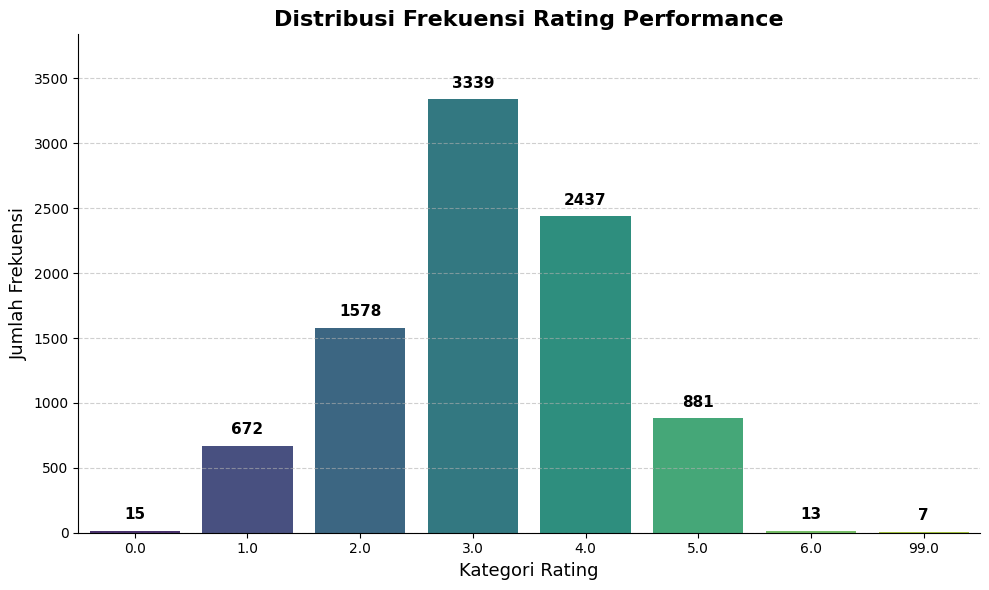

In [141]:
# Hitung frekuensi nilai rating
rating_counts = performance['rating'].value_counts().sort_index()
df_counts = rating_counts.reset_index()
df_counts.columns = ['Rating', 'Jumlah']

# Plot distribusi rating
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Rating', y='Jumlah', data=df_counts, palette='viridis')

# Tambahkan label jumlah di atas tiap batang
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2,
            height + (df_counts['Jumlah'].max() * 0.02),
            f'{int(height)}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Distribusi Frekuensi Rating Performance', fontsize=16, weight='bold')
plt.xlabel('Kategori Rating', fontsize=13)
plt.ylabel('Jumlah Frekuensi', fontsize=13)
plt.ylim(0, df_counts['Jumlah'].max() * 1.15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
sns.despine()
plt.tight_layout()
plt.show()

In [142]:
# --- Duplikasi dataframe agar data asli tetap aman ---
performance_clean = performance.copy()

# Ganti nilai di luar 1–5 menjadi NaN
performance_clean.loc[
    (performance_clean['rating'] < 1) | (performance_clean['rating'] > 5),
    'rating'
] = np.nan

# Tampilkan hasil setelah pembersihan
print("\nDistribusi rating setelah pembersihan:\n")
print(performance_clean['rating'].value_counts(dropna=False).sort_index())

# Cek jumlah data yang diubah jadi NaN
num_nan = performance_clean['rating'].isna().sum()
print(f"\nJumlah nilai rating yang diubah menjadi NaN: {num_nan}")



Distribusi rating setelah pembersihan:

rating
1.0     672
2.0    1578
3.0    3339
4.0    2437
5.0     881
NaN    1143
Name: count, dtype: int64

Jumlah nilai rating yang diubah menjadi NaN: 1143


### Competencies

In [143]:
competencies

,employee_id,score,pillar_code,year
0,EMP100000,2.0,GDR,2021
1,EMP100001,NaN,GDR,2021
2,EMP100002,1.0,GDR,2021
3,EMP100003,NaN,GDR,2021
4,EMP100004,3.0,GDR,2021
...,...,...,...,...
100495,DUP1942,5.0,CSI,2025
100496,DUP2096,3.0,CSI,2025
100497,DUP4177,2.0,CSI,2025
100498,DUP9801,5.0,CSI,2025


In [144]:
rating_competencies = pd.DataFrame({
    'Jumlah': competencies['score'].value_counts().sort_index(),
    'Persentase (%)': (competencies['score'].value_counts(normalize=True).sort_index() * 100).round(2)
})
display(rating_competencies)

,Jumlah,Persentase (%)
score,,
0.0,163,0.18
1.0,8688,9.68
2.0,17857,19.91
3.0,28206,31.44
4.0,22936,25.57
5.0,11523,12.84
6.0,165,0.18
99.0,171,0.19


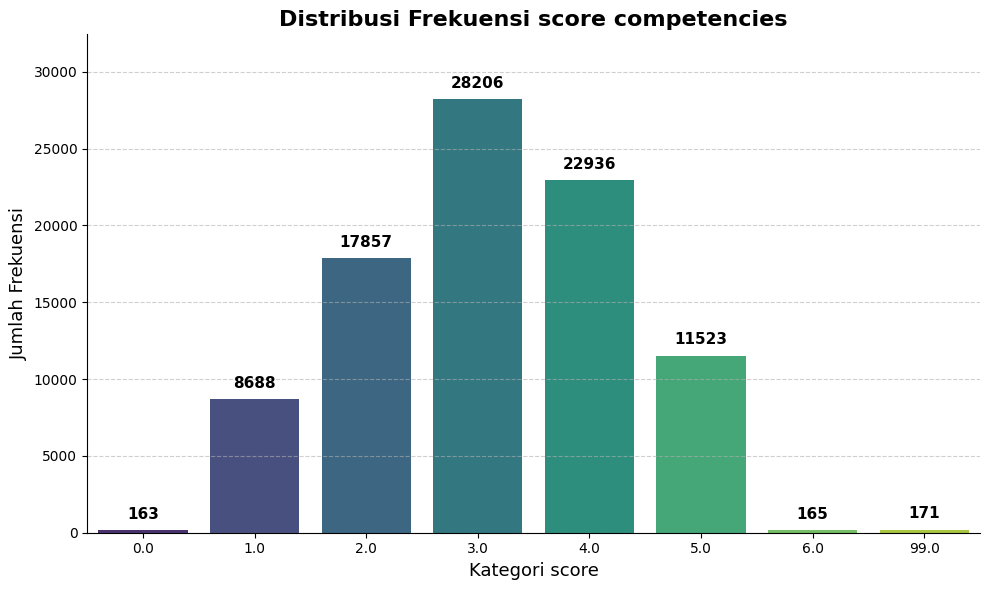

In [145]:
# Hitung frekuensi nilai score
score_counts = competencies['score'].value_counts().sort_index()
df_counts = score_counts.reset_index()
df_counts.columns = ['score', 'Jumlah']

# Plot distribusi score
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='score', y='Jumlah', data=df_counts, palette='viridis')

# Tambahkan label jumlah di atas tiap batang
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2,
            height + (df_counts['Jumlah'].max() * 0.02),
            f'{int(height)}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Distribusi Frekuensi score competencies', fontsize=16, weight='bold')
plt.xlabel('Kategori score', fontsize=13)
plt.ylabel('Jumlah Frekuensi', fontsize=13)
plt.ylim(0, df_counts['Jumlah'].max() * 1.15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
sns.despine()
plt.tight_layout()
plt.show()

In [146]:
# --- Duplikasi dataframe agar data asli tetap aman ---
competencies_clean = competencies.copy()

# Ganti nilai di luar 1–5 menjadi NaN
competencies_clean.loc[
    (competencies_clean['score'] < 1) | (competencies_clean['score'] > 5),
    'score'
] = np.nan

# Tampilkan hasil setelah pembersihan
print("\nDistribusi score setelah pembersihan:\n")
print(competencies_clean['score'].value_counts(dropna=False).sort_index())

# Cek jumlah data yang diubah jadi NaN
num_nan = competencies_clean['score'].isna().sum()
print(f"\nJumlah nilai score yang diubah menjadi NaN: {num_nan}")



Distribusi score setelah pembersihan:

score
1.0     8688
2.0    17857
3.0    28206
4.0    22936
5.0    11523
NaN    11290
Name: count, dtype: int64

Jumlah nilai score yang diubah menjadi NaN: 11290


In [147]:
competencies_clean

,employee_id,score,pillar_code,year
0,EMP100000,2.0,GDR,2021
1,EMP100001,NaN,GDR,2021
2,EMP100002,1.0,GDR,2021
3,EMP100003,NaN,GDR,2021
4,EMP100004,3.0,GDR,2021
...,...,...,...,...
100495,DUP1942,5.0,CSI,2025
100496,DUP2096,3.0,CSI,2025
100497,DUP4177,2.0,CSI,2025
100498,DUP9801,5.0,CSI,2025


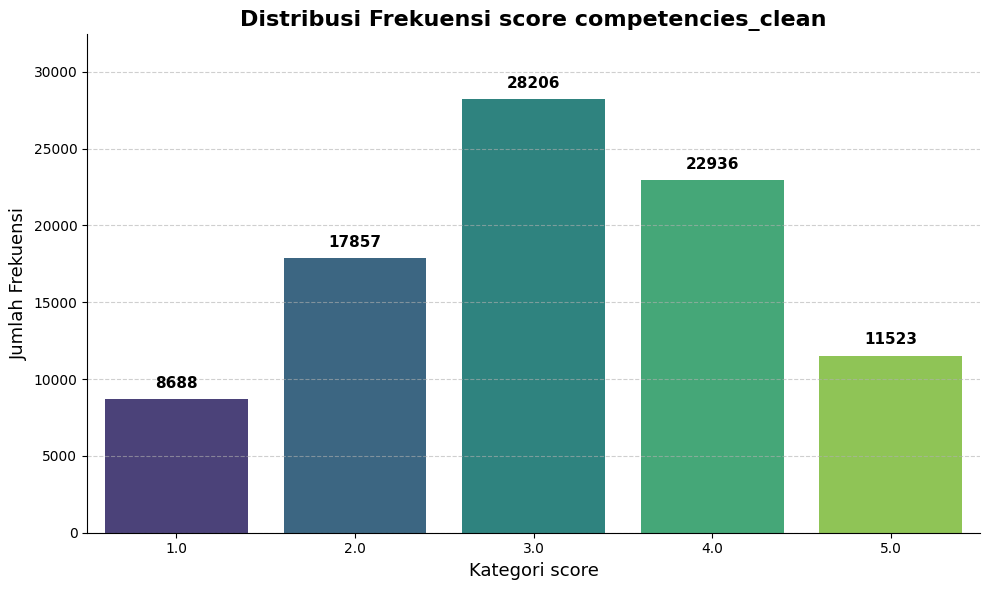

In [148]:
# Hitung frekuensi nilai score
score_counts = competencies_clean['score'].value_counts().sort_index()
df_counts = score_counts.reset_index()
df_counts.columns = ['score', 'Jumlah']

# Plot distribusi score
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='score', y='Jumlah', data=df_counts, palette='viridis')

# Tambahkan label jumlah di atas tiap batang
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2,
            height + (df_counts['Jumlah'].max() * 0.02),
            f'{int(height)}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Distribusi Frekuensi score competencies_clean', fontsize=16, weight='bold')
plt.xlabel('Kategori score', fontsize=13)
plt.ylabel('Jumlah Frekuensi', fontsize=13)
plt.ylim(0, df_counts['Jumlah'].max() * 1.15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
sns.despine()
plt.tight_layout()
plt.show()

## Competency Pillars

In [149]:
performance_employees = (
    performance_clean
    .merge(employees, on="employee_id", how="left")
)
display(performance_employees.head())

,employee_id,rating,year,fullname,nip,company_id,area_id,position_id,department_id,division_id,directorate_id,grade_id,education_id,major_id,years_of_service_months
0,EMP100000,2.0,2021,Rendra Pratama,806137,1,4,1,6,3,3,2,3,1,64
1,EMP100001,NaN,2021,Wulan Setiawan,476388,4,4,4,5,5,3,1,1,2,16
2,EMP100002,2.0,2021,Julia Jatmiko Situmorang,941921,1,3,5,1,1,3,1,3,1,58
3,EMP100003,NaN,2021,Oka Halim,751615,1,3,4,2,1,1,2,2,5,15
4,EMP100004,3.0,2021,Dwi Pratama,443809,3,4,6,5,3,3,1,1,5,34


In [150]:
# Tentukan tahun terakhir di dataset
LATEST_YEAR = performance_employees['year'].max()

# Hitung masa kerja yang disesuaikan untuk setiap baris
performance_employees['years_of_service_adjusted'] = (
    performance_employees['years_of_service_months']
    - (LATEST_YEAR - performance_employees['year']) * 12
)

# Hapus baris dengan masa kerja negatif
performance_employees = performance_employees[
    performance_employees['years_of_service_adjusted'] >= 0
].copy()

# Hapus kolom 'years_of_service_months' karena sudah tidak dibutuhkan
performance_employees.drop(columns=['years_of_service_months'], inplace=True)

# Tampilkan hasil akhir
display(performance_employees.head())


,employee_id,rating,year,fullname,nip,company_id,area_id,position_id,department_id,division_id,directorate_id,grade_id,education_id,major_id,years_of_service_adjusted
0,EMP100000,2.0,2021,Rendra Pratama,806137,1,4,1,6,3,3,2,3,1,16
2,EMP100002,2.0,2021,Julia Jatmiko Situmorang,941921,1,3,5,1,1,3,1,3,1,10
5,EMP100005,NaN,2021,Bayu Zulfikar,590302,1,1,5,2,3,1,1,3,1,18
6,EMP100006,4.0,2021,Indra Santoso,826406,1,3,3,2,1,2,1,1,4,34
7,EMP100007,4.0,2021,Rani Mahendra,878510,4,3,4,3,2,2,3,2,1,8


In [151]:
performance_employees = performance_employees[['employee_id', 'rating', 'year']].copy()

display(performance_employees.head())


,employee_id,rating,year
0,EMP100000,2.0,2021
2,EMP100002,2.0,2021
5,EMP100005,NaN,2021
6,EMP100006,4.0,2021
7,EMP100007,4.0,2021


In [152]:
# Pivot data agar 'year' jadi kolom, dan 'score' jadi nilai
competencies_pivot = competencies_clean.pivot_table(
   index=['employee_id', 'year'],
    columns='pillar_code',
    values='score'
).reset_index()

# (Opsional) urutkan kolom tahun
competencies_pivot = competencies_pivot[['employee_id'] + sorted([c for c in competencies_pivot.columns if c != 'employee_id'])]

display(competencies_pivot)


pillar_code,employee_id,CEX,CSI,FTC,GDR,IDS,LIE,QDD,SEA,STO,VCU,year
0,DUP1942,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2021
1,DUP1942,3.0,3.0,3.0,2.0,2.0,3.0,4.0,3.0,3.0,3.0,2022
2,DUP1942,2.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2023
3,DUP1942,2.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,NaN,2.0,2024
4,DUP1942,4.0,5.0,5.0,5.0,5.0,NaN,5.0,5.0,5.0,5.0,2025
...,...,...,...,...,...,...,...,...,...,...,...,...
9737,EMP101999,4.0,3.0,NaN,4.0,3.0,4.0,4.0,4.0,4.0,NaN,2021
9738,EMP101999,2.0,2.0,2.0,1.0,2.0,3.0,2.0,1.0,2.0,2.0,2022
9739,EMP101999,2.0,2.0,2.0,3.0,NaN,3.0,4.0,3.0,3.0,2.0,2023
9740,EMP101999,NaN,2.0,2.0,3.0,2.0,2.0,1.0,2.0,2.0,1.0,2024


In [153]:
# Gabungkan performance_employees dengan competencies_pivot berdasarkan employee_id dan year
performance_with_comp = performance_employees.merge(
    competencies_pivot,
    on=['employee_id', 'year'],
    how='left'  # gunakan left join agar semua baris performance tetap ada
)

display(performance_with_comp.head())


,employee_id,rating,year,CEX,CSI,FTC,GDR,IDS,LIE,QDD,SEA,STO,VCU
0,EMP100000,2.0,2021,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0
1,EMP100002,2.0,2021,3.0,2.0,1.0,1.0,2.0,1.0,3.0,2.0,2.0,NaN
2,EMP100005,NaN,2021,3.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,NaN,2.0
3,EMP100006,4.0,2021,4.0,NaN,4.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0
4,EMP100007,4.0,2021,4.0,5.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,3.0


In [154]:
performance_with_comp.shape

(8084, 13)

In [155]:
performance_with_comp.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,7380.0,3.145257,1.065944,1.0,2.0,3.0,4.0,5.0
year,8084.0,2023.293790,1.358404,2021.0,2022.0,2023.0,2024.0,2025.0
CEX,7399.0,3.103257,1.167455,1.0,2.0,3.0,4.0,5.0
CSI,7371.0,3.112196,1.170546,1.0,2.0,3.0,4.0,5.0
FTC,7395.0,3.110345,1.164573,1.0,2.0,3.0,4.0,5.0
GDR,7427.0,3.116467,1.160919,1.0,2.0,3.0,4.0,5.0
IDS,7424.0,3.118534,1.154721,1.0,2.0,3.0,4.0,5.0
LIE,7394.0,3.116852,1.162040,1.0,2.0,3.0,4.0,5.0
QDD,7373.0,3.117591,1.166605,1.0,2.0,3.0,4.0,5.0
SEA,7465.0,3.142532,1.163275,1.0,2.0,3.0,4.0,5.0


In [156]:
performance_with_comp['is_high'] = (performance_with_comp['rating'] == 5).astype(int)

In [157]:
performance_with_comp

,employee_id,rating,year,CEX,CSI,FTC,GDR,IDS,LIE,QDD,SEA,STO,VCU,is_high
0,EMP100000,2.0,2021,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0
1,EMP100002,2.0,2021,3.0,2.0,1.0,1.0,2.0,1.0,3.0,2.0,2.0,NaN,0
2,EMP100005,NaN,2021,3.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,NaN,2.0,0
3,EMP100006,4.0,2021,4.0,NaN,4.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,0
4,EMP100007,4.0,2021,4.0,5.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8079,DUP1942,5.0,2025,4.0,5.0,5.0,5.0,5.0,NaN,5.0,5.0,5.0,5.0,1
8080,DUP2096,3.0,2025,3.0,3.0,2.0,3.0,4.0,3.0,2.0,3.0,3.0,3.0,0
8081,DUP4177,2.0,2025,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,3.0,0
8082,DUP9801,5.0,2025,5.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,1


In [158]:
df_high1 = performance_with_comp[performance_with_comp['is_high'] == 1]
statistik_is_high_1 = df_high1.describe().T

print("Statistik Deskriptif untuk is_high = 1:")
display(statistik_is_high_1)

df_high2 = performance_with_comp[performance_with_comp['is_high'] == 0]
statistik_is_high_0 = df_high2.describe().T

print("Statistik Deskriptif untuk is_high = 0:")
display(statistik_is_high_0)

Statistik Deskriptif untuk is_high = 1:


,count,mean,std,min,25%,50%,75%,max
rating,736.0,5.000000,0.000000,5.0,5.00,5.0,5.0,5.0
year,736.0,2023.301630,1.309847,2021.0,2022.00,2023.0,2024.0,2025.0
CEX,667.0,4.673163,0.623308,2.0,4.00,5.0,5.0,5.0
CSI,667.0,4.682159,0.601072,2.0,4.00,5.0,5.0,5.0
FTC,674.0,4.679525,0.622483,2.0,4.25,5.0,5.0,5.0
GDR,671.0,4.667660,0.621611,2.0,4.00,5.0,5.0,5.0
IDS,673.0,4.659733,0.639799,2.0,4.00,5.0,5.0,5.0
LIE,680.0,4.673529,0.598874,2.0,4.00,5.0,5.0,5.0
QDD,672.0,4.696429,0.595652,2.0,5.00,5.0,5.0,5.0
SEA,688.0,4.691860,0.596782,2.0,5.00,5.0,5.0,5.0


Statistik Deskriptif untuk is_high = 0:


,count,mean,std,min,25%,50%,75%,max
rating,6644.0,2.939795,0.915841,1.0,2.0,3.0,4.0,4.0
year,7348.0,2023.293005,1.363256,2021.0,2022.0,2023.0,2025.0,2025.0
CEX,6732.0,2.947712,1.091396,1.0,2.0,3.0,4.0,5.0
CSI,6704.0,2.955996,1.095882,1.0,2.0,3.0,4.0,5.0
FTC,6721.0,2.952983,1.087068,1.0,2.0,3.0,4.0,5.0
GDR,6756.0,2.962404,1.086520,1.0,2.0,3.0,4.0,5.0
IDS,6751.0,2.964894,1.079415,1.0,2.0,3.0,4.0,5.0
LIE,6714.0,2.959190,1.086516,1.0,2.0,3.0,4.0,5.0
QDD,6701.0,2.959260,1.089425,1.0,2.0,3.0,4.0,5.0
SEA,6777.0,2.985244,1.089049,1.0,2.0,3.0,4.0,5.0


In [159]:
df_analysis = performance_with_comp.copy()
competency_cols = ['CEX', 'CSI', 'FTC', 'GDR', 'IDS', 'LIE', 'QDD', 'SEA', 'STO', 'VCU']

In [160]:
print("="*60)
print("1. KORELASI RATING vs COMPETENCY PILLARS")
print("="*60)

# Hitung korelasi Pearson + p-value untuk setiap pillar
correlation_results = []
for pillar in competency_cols:
    # Hapus missing values untuk analisis ini
    temp_df = df_analysis[['rating', pillar]].dropna()
    
    if len(temp_df) > 30:  # Minimum sample size untuk reliable correlation
        corr, p_value = pearsonr(temp_df['rating'], temp_df[pillar])
        
        correlation_results.append({
            'Pillar': pillar,
            'Pearson_r': corr,
            'P-value': p_value,
            'Significant': p_value < 0.05,
            'Sample_Size': len(temp_df)
        })

# Convert ke DataFrame dan urutkan
corr_df = pd.DataFrame(correlation_results)
corr_df = corr_df.sort_values('Pearson_r', ascending=False)

print("Hasil Korelasi:")
display(corr_df)

1. KORELASI RATING vs COMPETENCY PILLARS
Hasil Korelasi:


,Pillar,Pearson_r,P-value,Significant,Sample_Size
5,LIE,0.836611,0.0,True,6755
7,SEA,0.835201,0.0,True,6825
2,FTC,0.833821,0.0,True,6748
1,CSI,0.832985,0.0,True,6739
8,STO,0.831965,0.0,True,6751
0,CEX,0.830847,0.0,True,6757
4,IDS,0.830794,0.0,True,6769
6,QDD,0.829292,0.0,True,6737
3,GDR,0.828178,0.0,True,6781
9,VCU,0.826877,0.0,True,6765


In [161]:
print("\n" + "="*60)
print("2. T-TEST: HIGH PERFORMERS vs NON-HIGH PERFORMERS")
print("="*60)

ttest_results = []
for pillar in competency_cols:
    # Pisahkan data high performers vs others
    high_group = df_analysis[df_analysis['is_high'] == 1][pillar].dropna()
    other_group = df_analysis[df_analysis['is_high'] == 0][pillar].dropna()
    
    if len(high_group) > 10 and len(other_group) > 10:
        # Uji t-test untuk perbedaan mean
        t_stat, p_value = ttest_ind(high_group, other_group, equal_var=False)
        mean_diff = high_group.mean() - other_group.mean()
        
        # Hitung effect size (Cohen's d)
        cohens_d = mean_diff / np.sqrt((high_group.var() + other_group.var()) / 2)
        
        ttest_results.append({
            'Pillar': pillar,
            'High_Perf_Mean': high_group.mean(),
            'Other_Mean': other_group.mean(),
            'Mean_Difference': mean_diff,
            'T-statistic': t_stat,
            'P-value': p_value,
            'Significant': p_value < 0.05,
            'Effect_Size_Cohens_d': cohens_d
        })

ttest_df = pd.DataFrame(ttest_results)
ttest_df = ttest_df.sort_values('Mean_Difference', ascending=False)

print("Hasil T-Test:")
display(ttest_df)


2. T-TEST: HIGH PERFORMERS vs NON-HIGH PERFORMERS
Hasil T-Test:


,Pillar,High_Perf_Mean,Other_Mean,Mean_Difference,T-statistic,P-value,Significant,Effect_Size_Cohens_d
6,QDD,4.696429,2.959260,1.737169,65.421266,0.0,True,1.978629
2,FTC,4.679525,2.952983,1.726542,63.013812,0.0,True,1.949183
1,CSI,4.682159,2.955996,1.726163,64.294508,0.0,True,1.953089
0,CEX,4.673163,2.947712,1.725451,62.612751,0.0,True,1.941494
5,LIE,4.673529,2.959190,1.714340,64.645767,0.0,True,1.954199
7,SEA,4.691860,2.985244,1.706616,64.844603,0.0,True,1.943497
3,GDR,4.667660,2.962404,1.705256,62.242484,0.0,True,1.926551
4,IDS,4.659733,2.964894,1.694838,60.652913,0.0,True,1.910181
8,STO,4.655572,2.966871,1.688701,61.202428,0.0,True,1.889761
9,VCU,4.659325,2.975588,1.683737,60.338710,0.0,True,1.885778



3. VISUALIZATION OF STATISTICAL RESULTS - ENHANCED


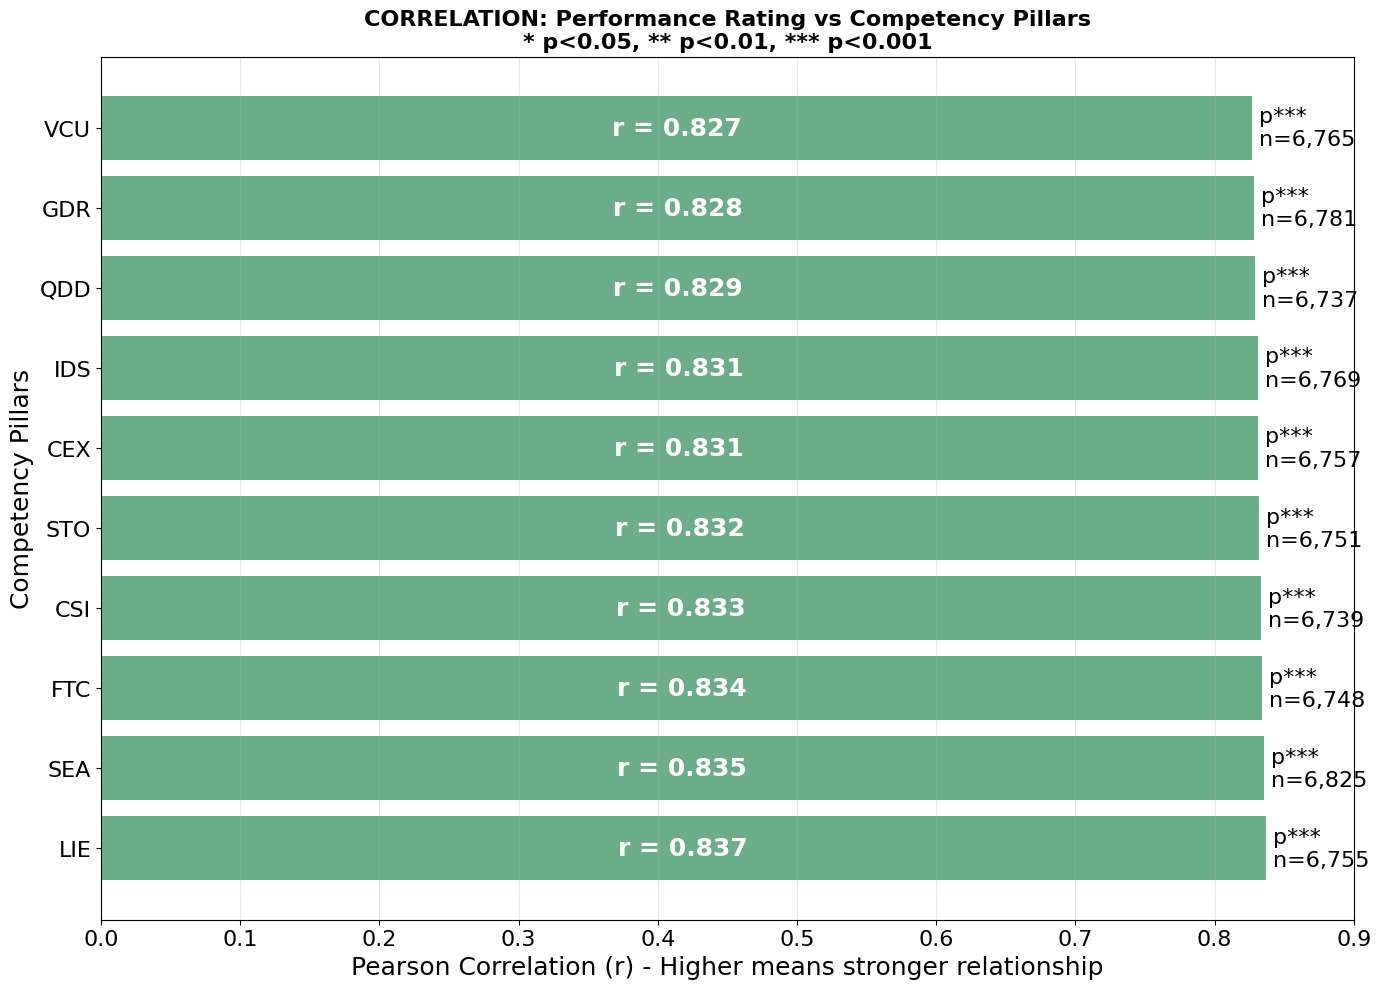

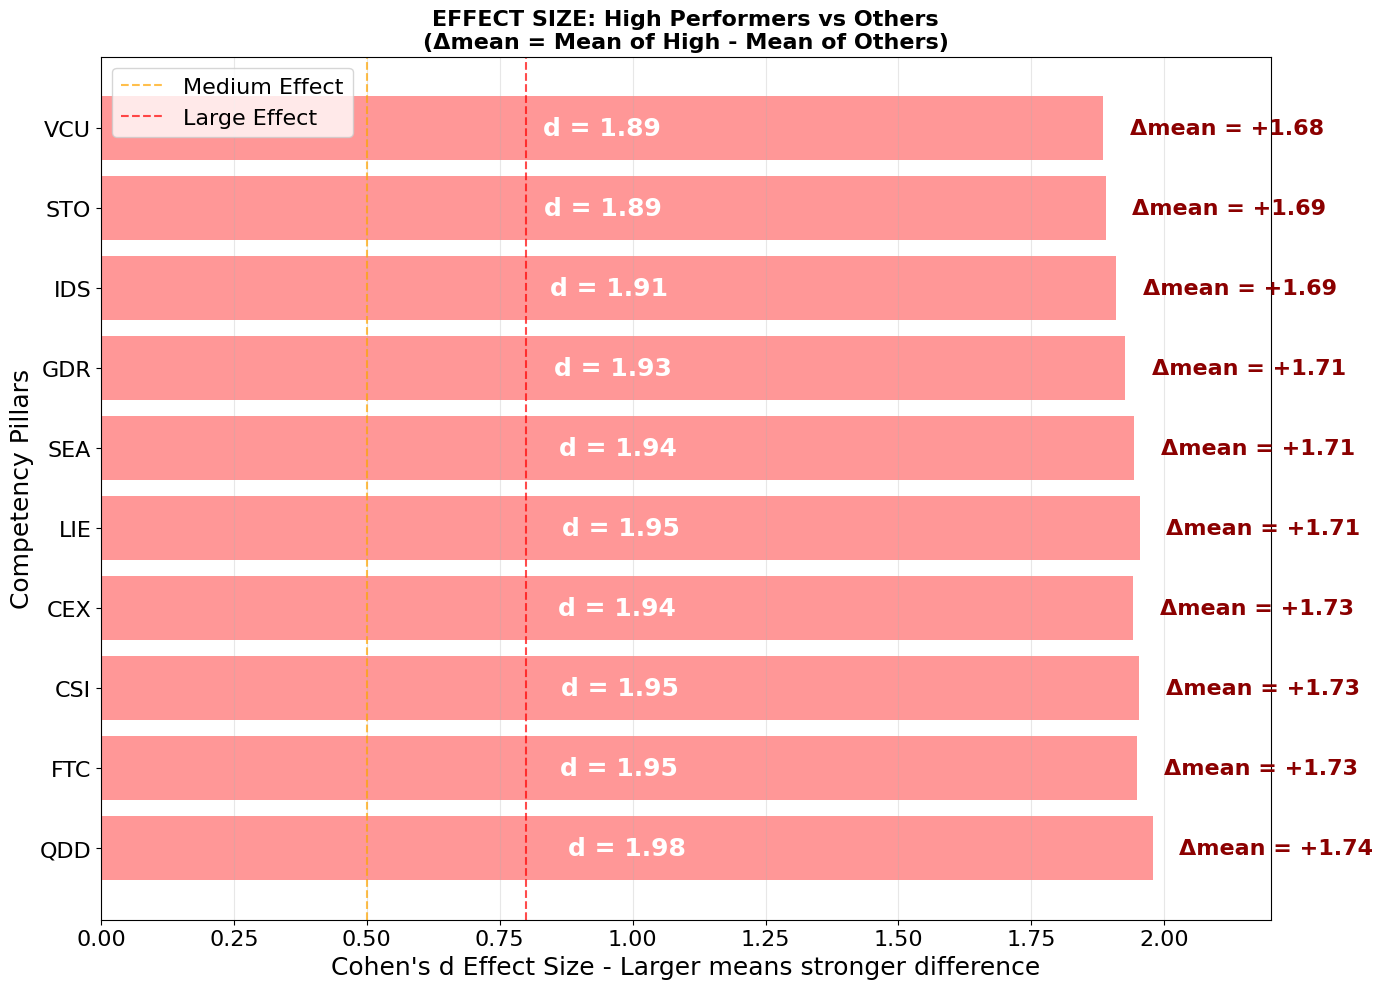

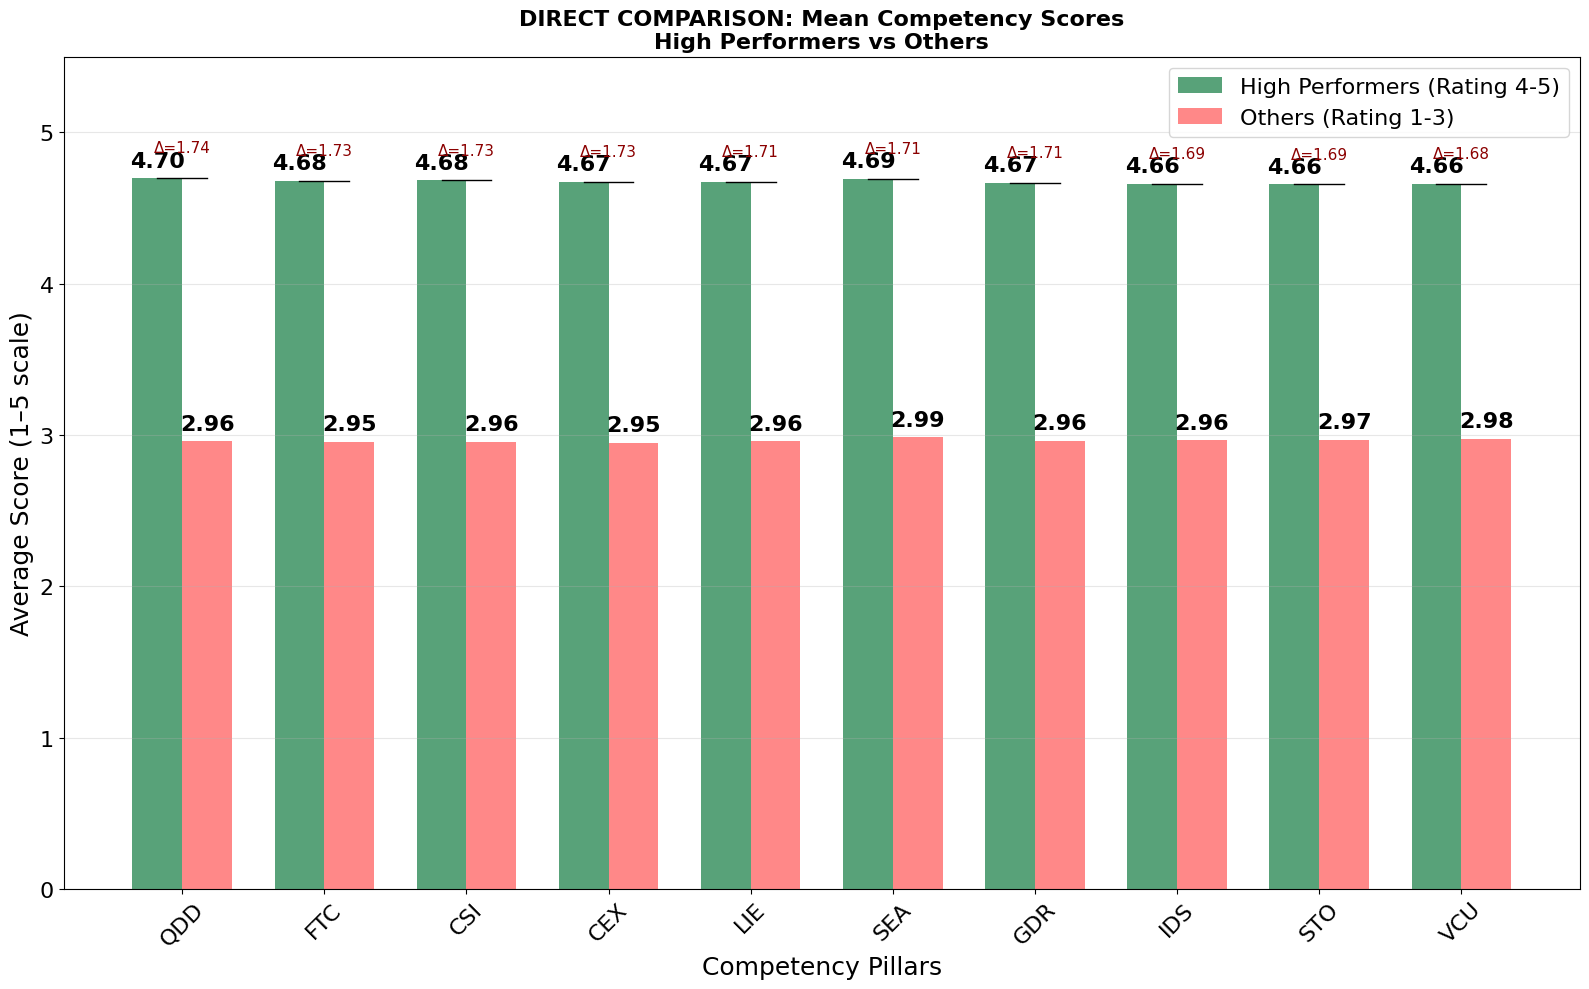


SUMMARY STATISTICS - COMPETENCY PILLARS ANALYSIS
📊 AVERAGE CORRELATION: 0.8317
🎯 AVERAGE EFFECT SIZE: 1.933
📈 AVERAGE MEAN DIFFERENCE: 1.711 points

🏆 TOP 3 PILLARS BY CORRELATION:
   LIE: r = 0.8366
   SEA: r = 0.8352
   FTC: r = 0.8338

🚀 TOP 3 PILLARS BY EFFECT SIZE:
   QDD: d = 1.98, Δmean = 1.737
   FTC: d = 1.95, Δmean = 1.727
   CSI: d = 1.95, Δmean = 1.726

✅ SIGNIFICANCE: All 10 pillars are significant (p < 0.001)


In [166]:
print("\n" + "="*60)
print("3. VISUALIZATION OF STATISTICAL RESULTS - ENHANCED")
print("="*60)

# Plot 1: Correlation with significance markers and clear values
plt.figure(figsize=(14, 10))
colors = ['#2E8B57' if sig else 'gray' for sig in corr_df['Significant']]
bars = plt.barh(corr_df['Pillar'], corr_df['Pearson_r'], color=colors, alpha=0.7)

# Add correlation values and annotations
for i, (pillar, row) in enumerate(corr_df.iterrows()):
    # Display correlation value inside the bar
    plt.text(row['Pearson_r']/2, i, f'r = {row["Pearson_r"]:.3f}',
             va='center', ha='center', fontsize=18, fontweight='bold', color='white')

    # Display p-value and sample size outside the bar
    star = '***' if row['P-value'] < 0.001 else '**' if row['P-value'] < 0.01 else '*' if row['P-value'] < 0.05 else '(ns)'
    plt.text(row['Pearson_r'] + 0.005, i, f'p{star}\nn={row["Sample_Size"]:,}',
             va='center', fontsize=16, color='black')

plt.xlabel('Pearson Correlation (r) - Higher means stronger relationship', fontsize=18)
plt.ylabel('Competency Pillars', fontsize=18)
plt.title('CORRELATION: Performance Rating vs Competency Pillars\n* p<0.05, ** p<0.01, *** p<0.001',
          fontsize=16, fontweight='bold')
plt.xlim(0, 0.9)
plt.grid(axis='x', alpha=0.3)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

# Plot 2: Effect sizes with detailed mean difference
plt.figure(figsize=(14, 10))
colors = ['#FF6B6B' for _ in ttest_df['Effect_Size_Cohens_d']]
bars = plt.barh(ttest_df['Pillar'], ttest_df['Effect_Size_Cohens_d'], color=colors, alpha=0.7)

# Add effect size and mean difference
for i, (pillar, row) in enumerate(ttest_df.iterrows()):
    # Effect size inside bar
    plt.text(row['Effect_Size_Cohens_d']/2, i, f'd = {row["Effect_Size_Cohens_d"]:.2f}',
             va='center', ha='center', fontsize=18, fontweight='bold', color='white')

    # Mean difference outside bar
    mean_diff_text = f'Δmean = +{row["Mean_Difference"]:.2f}'
    plt.text(row['Effect_Size_Cohens_d'] + 0.05, i, mean_diff_text,
             va='center', fontsize=16, color='darkred', fontweight='bold')

plt.xlabel("Cohen's d Effect Size - Larger means stronger difference", fontsize=18)
plt.ylabel('Competency Pillars', fontsize=18)
plt.title("EFFECT SIZE: High Performers vs Others\n(Δmean = Mean of High - Mean of Others)",
          fontsize=16, fontweight='bold')
plt.xlim(0, 2.2)
plt.axvline(x=0.5, color='orange', linestyle='--', alpha=0.7, label='Medium Effect')
plt.axvline(x=0.8, color='red', linestyle='--', alpha=0.7, label='Large Effect')
plt.legend(fontsize=16)
plt.grid(axis='x', alpha=0.3)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

# Plot 3: SIDE-BY-SIDE COMPARISON - Mean Scores of High vs Others
plt.figure(figsize=(16, 10))

# Prepare grouped bar data
pillars = ttest_df['Pillar']
high_means = ttest_df['High_Perf_Mean']
other_means = ttest_df['Other_Mean']
x = np.arange(len(pillars))
width = 0.35

plt.bar(x - width/2, high_means, width, label='High Performers (Rating 4-5)',
        color='#2E8B57', alpha=0.8)
plt.bar(x + width/2, other_means, width, label='Others (Rating 1-3)',
        color='#FF6B6B', alpha=0.8)

# Add mean values above bars
for i, (high, other) in enumerate(zip(high_means, other_means)):
    plt.text(i - width/2, high + 0.05, f'{high:.2f}', ha='center', va='bottom',
             fontsize=16, fontweight='bold')
    plt.text(i + width/2, other + 0.05, f'{other:.2f}', ha='center', va='bottom',
             fontsize=16, fontweight='bold')
    plt.plot([i - width/2, i + width/2], [high, high], 'k-', lw=1)
    plt.text(i, high + 0.15, f'Δ={high-other:.2f}', ha='center', va='bottom',
             fontsize=11, color='darkred')

plt.xlabel('Competency Pillars', fontsize=18)
plt.ylabel('Average Score (1–5 scale)', fontsize=18)
plt.title('DIRECT COMPARISON: Mean Competency Scores\nHigh Performers vs Others',
          fontsize=16, fontweight='bold')
plt.xticks(x, pillars, rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.ylim(0, 5.5)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# SUMMARY STATISTICS - LARGE FONT
print("\n" + "="*60)
print("SUMMARY STATISTICS - COMPETENCY PILLARS ANALYSIS")
print("="*60)

print(f"📊 AVERAGE CORRELATION: {corr_df['Pearson_r'].mean():.4f}")
print(f"🎯 AVERAGE EFFECT SIZE: {ttest_df['Effect_Size_Cohens_d'].mean():.3f}")
print(f"📈 AVERAGE MEAN DIFFERENCE: {ttest_df['Mean_Difference'].mean():.3f} points")

print(f"\n🏆 TOP 3 PILLARS BY CORRELATION:")
for i, row in corr_df.head(3).iterrows():
    print(f"   {row['Pillar']}: r = {row['Pearson_r']:.4f}")

print(f"\n🚀 TOP 3 PILLARS BY EFFECT SIZE:")
for i, row in ttest_df.head(3).iterrows():
    print(f"   {row['Pillar']}: d = {row['Effect_Size_Cohens_d']:.2f}, Δmean = {row['Mean_Difference']:.3f}")

print(f"\n✅ SIGNIFICANCE: All {len(corr_df)} pillars are significant (p < 0.001)")


In [105]:
print("\n" + "="*60)
print("4. LOGISTIC REGRESSION - PREDIKSI HIGH PERFORMER")
print("="*60)

# Siapkan data
logit_data = df_analysis[['is_high'] + competency_cols].dropna()

if len(logit_data) > 50:
    X = logit_data[competency_cols]
    y = logit_data['is_high']
    
    # Handle missing values dengan mean
    X = X.fillna(X.mean())
    
    # Standardize features
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Logistic Regression dengan sklearn
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_scaled, y)
    
    # Dapatkan coefficients
    feature_importance = pd.DataFrame({
        'Pillar': competency_cols,
        'Coefficient': model.coef_[0],
        'Odds_Ratio': np.exp(model.coef_[0])  # Convert ke odds ratio
    }).sort_values('Coefficient', ascending=False)
    
    print("Feature Importance dari Logistic Regression:")
    display(feature_importance)
    
    # Hitung accuracy
    from sklearn.metrics import accuracy_score
    y_pred = model.predict(X_scaled)
    accuracy = accuracy_score(y, y_pred)
    
    print(f"\nModel Accuracy: {accuracy:.3f}")
    print(f"Baseline (predict all 0): {1 - y.mean():.3f}")
    


4. LOGISTIC REGRESSION - PREDIKSI HIGH PERFORMER
Feature Importance dari Logistic Regression:


,Pillar,Coefficient,Odds_Ratio
6,QDD,0.877035,2.403762
1,CSI,0.722478,2.059531
5,LIE,0.653508,1.922273
2,FTC,0.549494,1.732375
7,SEA,0.546614,1.727394
4,IDS,0.536833,1.710580
8,STO,0.521512,1.684573
3,GDR,0.496680,1.643256
0,CEX,0.436545,1.547352
9,VCU,0.386677,1.472081



Model Accuracy: 0.976
Baseline (predict all 0): 0.903


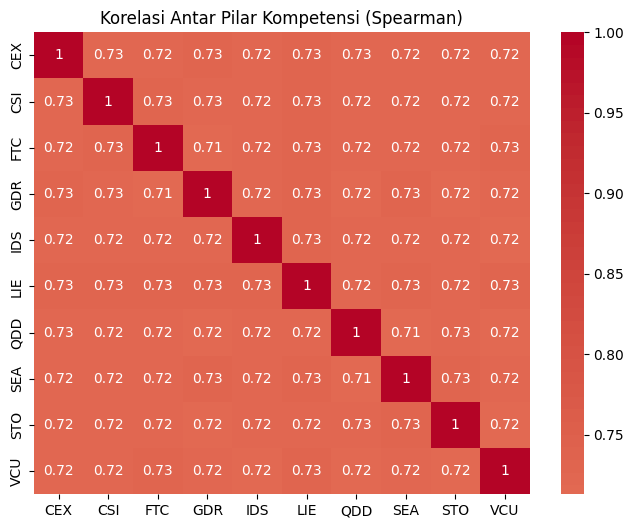

,Pillar,High_Mean,Low_Mean,Diff,p_value
6,QDD,4.696429,2.934213,1.762216,0.0
2,FTC,4.679525,2.929206,1.750319,0.0
0,CEX,4.673163,2.922989,1.750175,0.0
1,CSI,4.682159,2.934453,1.747706,0.0
5,LIE,4.673529,2.938107,1.735422,0.0
7,SEA,4.691860,2.961545,1.730316,0.0
3,GDR,4.667660,2.942717,1.724943,0.0
4,IDS,4.659733,2.936844,1.722889,0.0
8,STO,4.655572,2.942244,1.713327,0.0
9,VCU,4.659325,2.955293,1.704032,0.0


Optimization terminated successfully.
         Current function value: 0.161073
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                is_high   No. Observations:                 7380
Model:                          Logit   Df Residuals:                     7369
Method:                           MLE   Df Model:                           10
Date:                Tue, 28 Oct 2025   Pseudo R-squ.:                  0.5036
Time:                        12:47:00   Log-Likelihood:                -1188.7
converged:                       True   LL-Null:                       -2394.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.9676      0.145    -34.345      0.000      -5.251      -4.684
CEX            0.3867      0.

In [111]:
# ============================================
# STEP 1 — Discover the Pattern of Success
# ============================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, ttest_ind
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# ============================================
# 1️⃣ Dataset & Persiapan
# ============================================

# Asumsi dataframe sudah ada:
# performance_with_comp

pillar_cols = ['CEX', 'CSI', 'FTC', 'GDR', 'IDS', 'LIE', 'QDD', 'SEA', 'STO', 'VCU']

# Hapus baris tanpa rating
df = performance_with_comp.dropna(subset=['rating']).copy()

# ============================================
# 2️⃣ Korelasi Antar Pilar
# ============================================

plt.figure(figsize=(8,6))
sns.heatmap(df[pillar_cols].corr(method='spearman'), annot=True, cmap='coolwarm', center=0)
plt.title("Korelasi Antar Pilar Kompetensi (Spearman)")
plt.show()

# ============================================
# 3️⃣ Uji Perbedaan High vs Non-High Performer
# ============================================

ttest_results = []
for col in pillar_cols:
    high = df[df['is_high'] == 1][col].dropna()
    low = df[df['is_high'] == 0][col].dropna()
    if len(high) < 10 or len(low) < 10:
        continue
    t, p = ttest_ind(high, low, equal_var=False)
    ttest_results.append({
        'Pillar': col,
        'High_Mean': high.mean(),
        'Low_Mean': low.mean(),
        'Diff': high.mean() - low.mean(),
        'p_value': p
    })

ttest_df = pd.DataFrame(ttest_results).sort_values('Diff', ascending=False)
display(ttest_df)

# ============================================
# 4️⃣ Model Logistik (fixed index alignment)
# ============================================

X = df[pillar_cols].fillna(0)
y = df['is_high']

# Pastikan index sejajar
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=pillar_cols)

X_scaled = sm.add_constant(X_scaled)
model = sm.Logit(y, X_scaled).fit()
print(model.summary())
odds = np.exp(model.params)
print("\nTop Odds Ratios:")
print(odds.sort_values(ascending=False).head(10))

In [122]:
df_analysis

,employee_id,rating,year,CEX,CSI,FTC,GDR,IDS,LIE,QDD,SEA,STO,VCU,is_high,cluster
0,EMP100000,2.0,2021,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0,0
1,EMP100002,2.0,2021,3.0,2.0,1.0,1.0,2.0,1.0,3.0,2.0,2.0,3.0,0,0
3,EMP100006,4.0,2021,4.0,3.0,4.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,0,1
4,EMP100007,4.0,2021,4.0,5.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,3.0,0,1
6,EMP100011,3.0,2021,3.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,4.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8079,DUP1942,5.0,2025,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,1,1
8080,DUP2096,3.0,2025,3.0,3.0,2.0,3.0,4.0,3.0,2.0,3.0,3.0,3.0,0,2
8081,DUP4177,2.0,2025,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,3.0,0,0
8082,DUP9801,5.0,2025,5.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,1,1


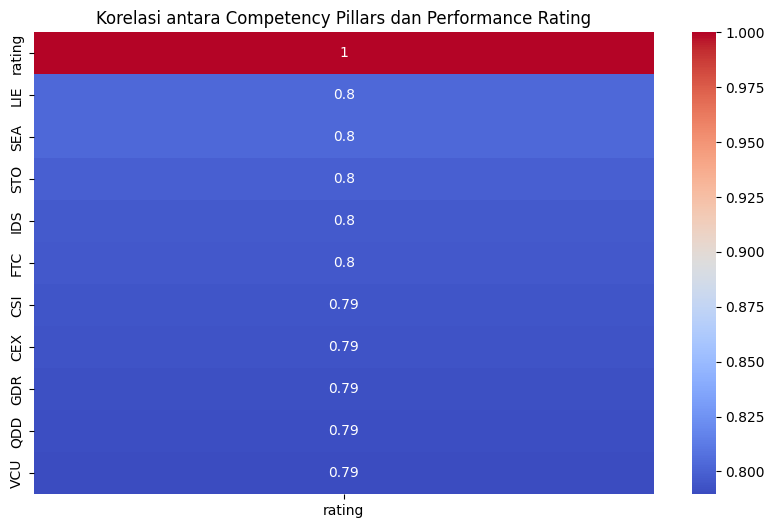

In [117]:
# --- Korelasi Competency Pillars dengan Performance Rating ---
plt.figure(figsize=(10,6))
corr = df_analysis[competency_cols + ['rating']].corr()
sns.heatmap(corr[['rating']].sort_values(by='rating', ascending=False), annot=True, cmap='coolwarm')
plt.title("Korelasi antara Competency Pillars dan Performance Rating")
plt.show()


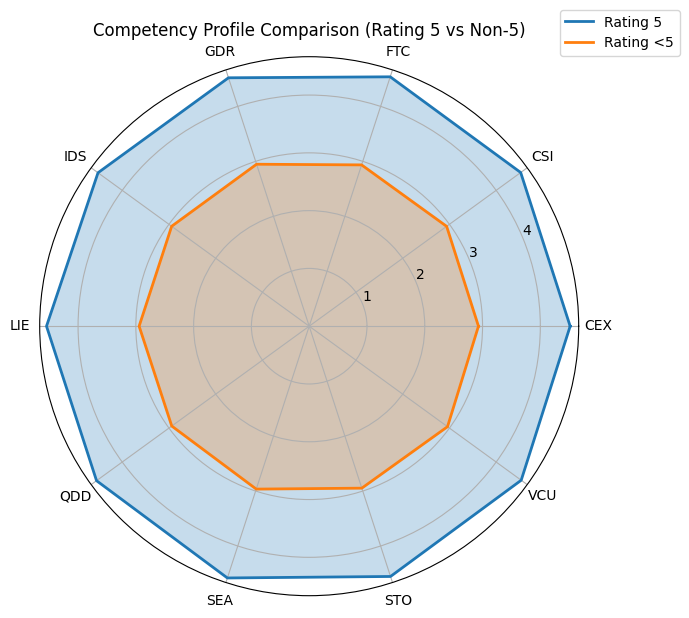

In [120]:
# --- Radar Chart: Pilar Kompetensi Rating 5 vs Non-5 ---
from math import pi

avg_5 = df_analysis[df_analysis['rating'] == 5][competency_cols].mean()
avg_non5 = df_analysis[df_analysis['rating'] < 5][competency_cols].mean()

categories = competency_cols
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(7,7))
ax = plt.subplot(111, polar=True)

ax.plot(angles, list(avg_5) + [avg_5[0]], linewidth=2, label='Rating 5')
ax.fill(angles, list(avg_5) + [avg_5[0]], alpha=0.25)

ax.plot(angles, list(avg_non5) + [avg_non5[0]], linewidth=2, label='Rating <5')
ax.fill(angles, list(avg_non5) + [avg_non5[0]], alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title("Competency Profile Comparison (Rating 5 vs Non-5)")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()


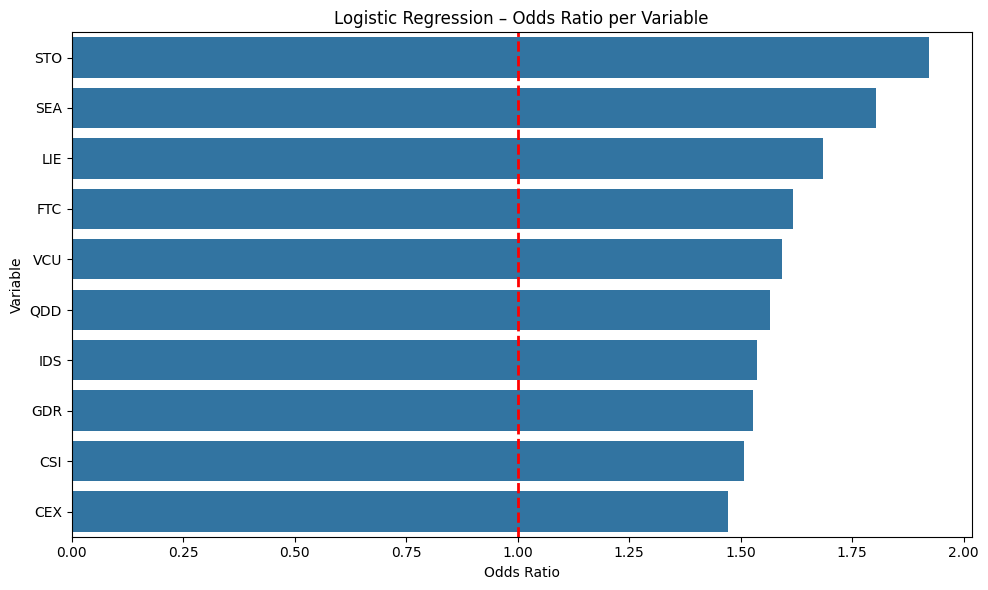

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Ambil koefisien & confidence interval
coef = model.params
conf = model.conf_int()
conf.columns = ['2.5%', '97.5%']

# Hitung Odds Ratio
odds_ratio = np.exp(coef)
conf_odds = np.exp(conf)

# Buat dataframe ringkasan
summary_df = pd.DataFrame({
    'Coefficient': coef,
    'Odds Ratio': odds_ratio,
    'CI Lower': conf_odds['2.5%'],
    'CI Upper': conf_odds['97.5%']
}).sort_values('Odds Ratio', ascending=False)

# Drop konstanta
summary_df = summary_df.drop('const')

# Tentukan warna berdasarkan arah koefisien
colors = ['tab:blue' if c > 0 else 'tab:red' for c in summary_df['Coefficient']]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=summary_df['Odds Ratio'],
    y=summary_df.index,
    palette=colors
)
plt.axvline(1, color='red', linestyle='--', linewidth=2)
plt.title('Logistic Regression – Odds Ratio per Variable', fontsize=12)
plt.xlabel('Odds Ratio')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()



=== SUCCESS FORMULA ===
STO: 0.136
SEA: 0.123
LIE: 0.108
FTC: 0.100
VCU: 0.097
QDD: 0.093
IDS: 0.089
GDR: 0.088
CSI: 0.085
CEX: 0.080


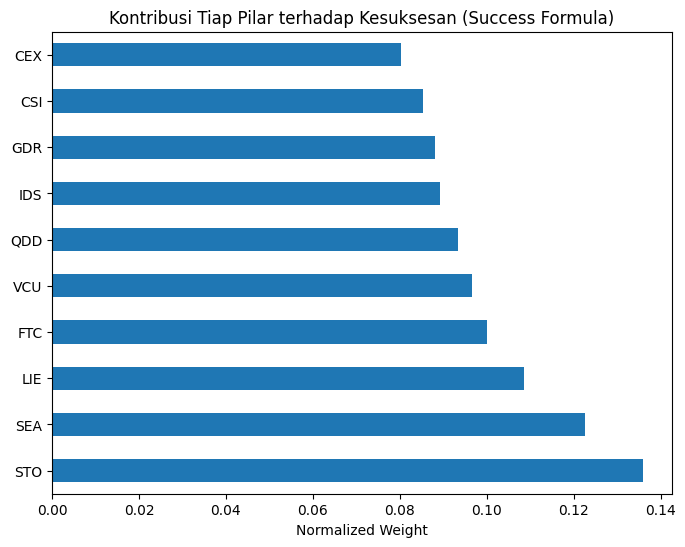

In [114]:


# ============================================
# 5️⃣ Success Formula (Bobot Normalisasi)
# ============================================

weights = model.params[1:] / abs(model.params[1:]).sum()
success_formula = weights.sort_values(ascending=False)

print("\n=== SUCCESS FORMULA ===")
for k, v in success_formula.items():
    print(f"{k}: {v:.3f}")

# Visualisasi kontribusi pilar
success_formula.plot(kind='barh', figsize=(8,6))
plt.title("Kontribusi Tiap Pilar terhadap Kesuksesan (Success Formula)")
plt.xlabel("Normalized Weight")
plt.show()


Korelasi Rating vs Pilar Kompetensi:


,Pearson_r
LIE,0.836611
SEA,0.835201
FTC,0.833821
CSI,0.832985
STO,0.831965
CEX,0.830847
IDS,0.830794
QDD,0.829292
GDR,0.828178
VCU,0.826877


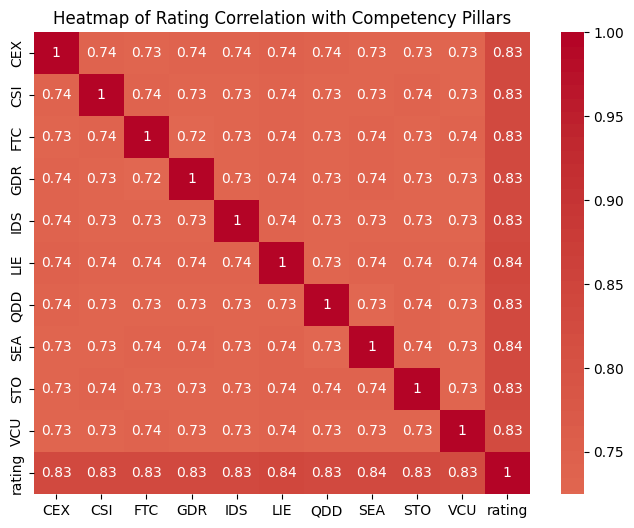

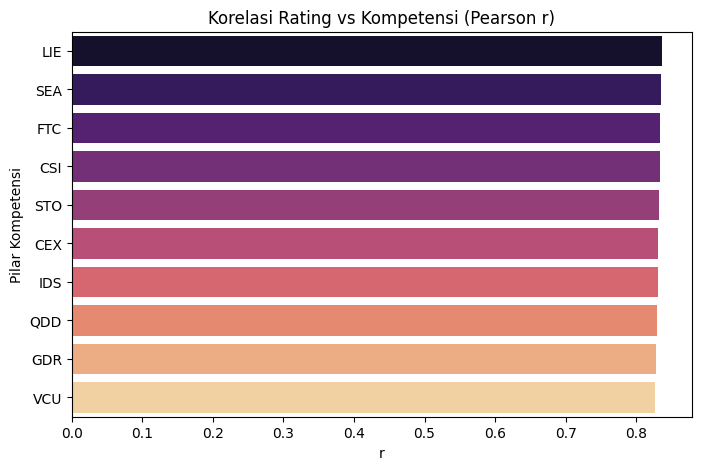

In [131]:
# ============================================================
# KORELASI RATING vs KOMPETENSI
# ============================================================

# Salin dataframe
df_corr = performance_with_comp.copy()

# Pilih kolom kompetensi (hindari kolom non-kompetensi seperti 'is_high')
competency_cols = [
    c for c in df_corr.columns 
    if c not in ['employee_id', 'rating', 'year', 'is_high']
]

# Hitung korelasi Pearson antara rating dan kompetensi
corrs = df_corr[competency_cols + ['rating']].corr()['rating'].drop('rating')

# Tampilkan hasil
corrs_df = corrs.sort_values(ascending=False).to_frame().rename(columns={'rating':'Pearson_r'})
print("Korelasi Rating vs Pilar Kompetensi:")
display(corrs_df)

# ============================================================
# VISUALISASI HEATMAP
# ============================================================
plt.figure(figsize=(8,6))
sns.heatmap(df_corr[competency_cols + ['rating']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Rating Correlation with Competency Pillars')
plt.show()

# ============================================================
# BARPLOT KORELASI RATING
# ============================================================
plt.figure(figsize=(8,5))
sns.barplot(x=corrs_df['Pearson_r'], y=corrs_df.index, palette='magma')
plt.title('Korelasi Rating vs Kompetensi (Pearson r)')
plt.xlabel('r')
plt.ylabel('Pilar Kompetensi')
plt.show()


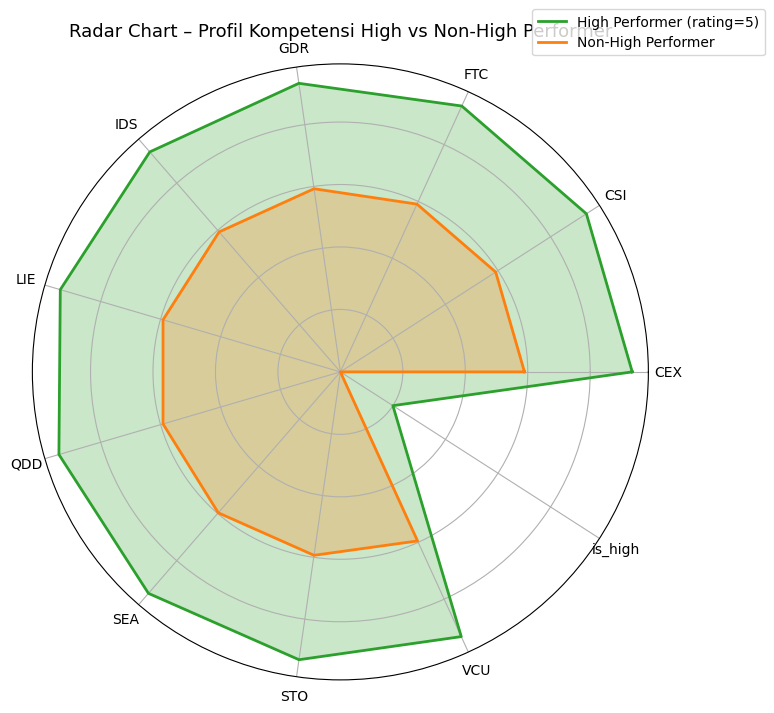

In [ ]:
# ============================================================
# RADAR CHART: High vs Non-High Performer (Competency Profile)
# ============================================================

import numpy as np
import matplotlib.pyplot as plt

# Salin dataframe
df_radar = performance_with_comp.copy()

# Tentukan kolom kompetensi
competency_cols = [c for c in df_radar.columns if c not in ['employee_id','rating','year']]

# Tentukan high performer
df_radar['is_high'] = (df_radar['rating'] == 5).astype(int)

# Hitung rata-rata skor tiap pilar untuk masing-masing kelompok
avg_high = df_radar[df_radar['is_high']==1][competency_cols].mean()
avg_non  = df_radar[df_radar['is_high']==0][competency_cols].mean()

# Buat array untuk radar
labels = competency_cols
num_vars = len(labels)

angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # tutup lingkaran

# Nilai untuk plot (tutup juga lingkaran)
values_high = avg_high.tolist() + [avg_high.tolist()[0]]
values_non  = avg_non.tolist()  + [avg_non.tolist()[0]]

# ============================================================
# PLOTTING RADAR
# ============================================================

plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)

# Plot garis dan isi area
ax.plot(angles, values_high, color='tab:green', linewidth=2, label='High Performer (rating=5)')
ax.fill(angles, values_high, color='tab:green', alpha=0.25)

ax.plot(angles, values_non, color='tab:orange', linewidth=2, label='Non-High Performer')
ax.fill(angles, values_non, color='tab:orange', alpha=0.25)

# Pengaturan sumbu
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=10)
ax.set_yticklabels([])
ax.set_title('Radar Chart – Profil Kompetensi High vs Non-High Performer', size=13, pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

plt.show()


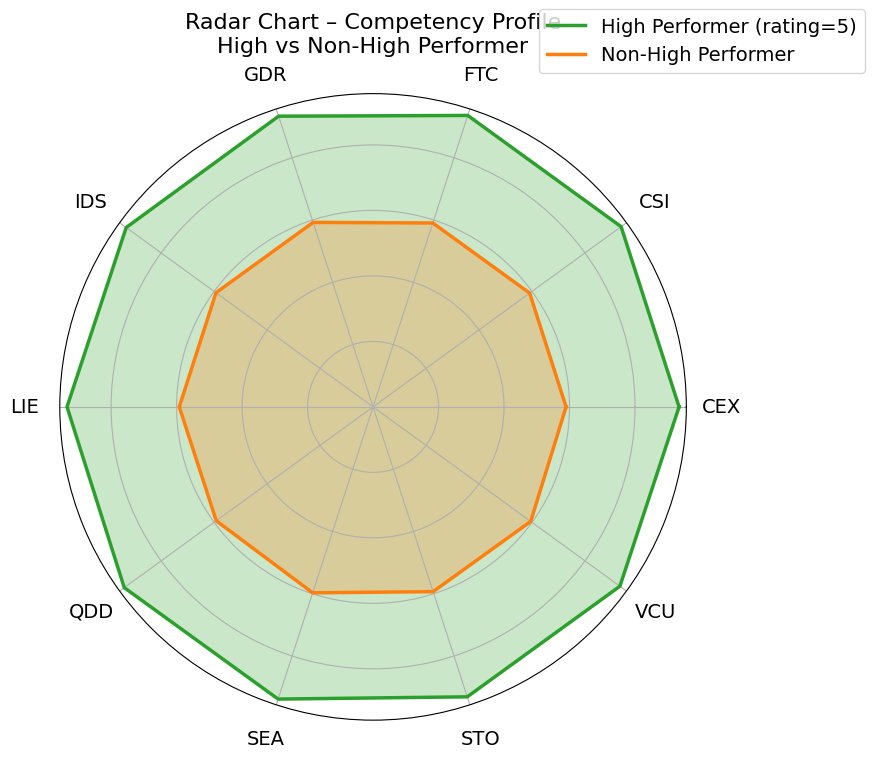

In [125]:
# ============================================================
# RADAR CHART: High vs Non-High Performer (Competency Profile)
# ============================================================

import numpy as np
import matplotlib.pyplot as plt

# Salin dataframe
df_radar = performance_with_comp.copy()

# Tambahkan flag high performer
df_radar['is_high'] = (df_radar['rating'] == 5).astype(int)

# Tentukan kolom kompetensi (hindari kolom non-kompetensi)
exclude_cols = ['employee_id', 'rating', 'year', 'is_high']
competency_cols = [c for c in df_radar.columns if c not in exclude_cols]

# Hitung rata-rata skor tiap pilar untuk masing-masing kelompok
avg_high = df_radar[df_radar['is_high']==1][competency_cols].mean()
avg_non  = df_radar[df_radar['is_high']==0][competency_cols].mean()

# Buat array untuk radar
labels = competency_cols
num_vars = len(labels)

angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # tutup lingkaran

# Nilai untuk plot (tutup juga lingkaran)
values_high = avg_high.tolist() + [avg_high.tolist()[0]]
values_non  = avg_non.tolist()  + [avg_non.tolist()[0]]

# ============================================================
# PLOTTING RADAR
# ============================================================

plt.figure(figsize=(9,9))
ax = plt.subplot(111, polar=True)

# Plot garis dan isi area
ax.plot(angles, values_high, color='tab:green', linewidth=2.5, label='High Performer (rating=5)')
ax.fill(angles, values_high, color='tab:green', alpha=0.25)

ax.plot(angles, values_non, color='tab:orange', linewidth=2.5, label='Non-High Performer')
ax.fill(angles, values_non, color='tab:orange', alpha=0.25)

# Pengaturan sumbu
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=14)
ax.set_yticklabels([])
ax.tick_params(axis='x', pad=15)
ax.set_title('Radar Chart – Competency Profile\nHigh vs Non-High Performer', 
             size=16, pad=30)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.15), fontsize=14)

plt.tight_layout()
plt.show()


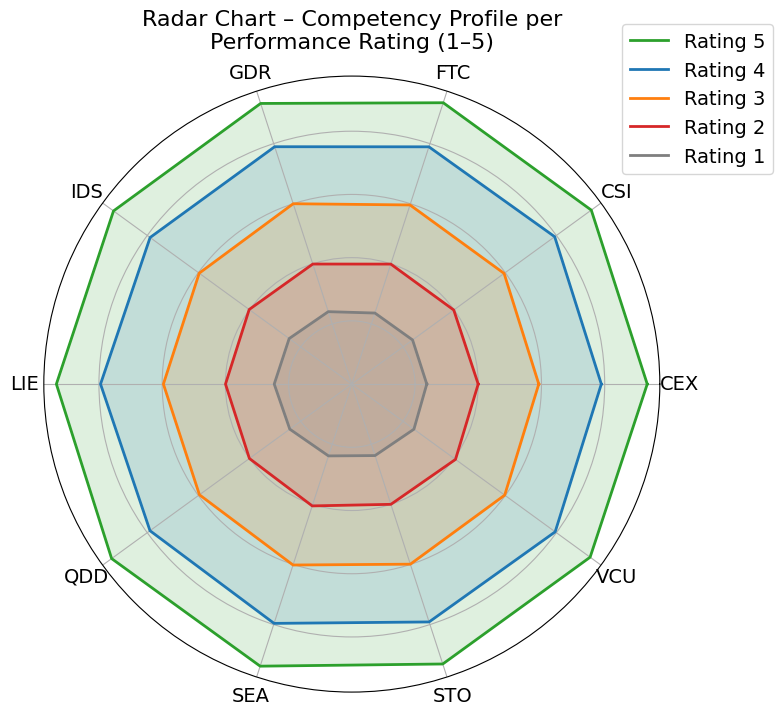

In [130]:
# ============================================================
# RADAR CHART: Profil Kompetensi berdasarkan Rating (1–5)
# ============================================================

import numpy as np
import matplotlib.pyplot as plt

# Salin dataframe
df_radar = performance_with_comp.copy()

# Tentukan kolom kompetensi (hindari kolom non-kompetensi)
exclude_cols = ['employee_id', 'year', 'rating', 'is_high']  # kalau 'is_high' masih ada, tetap dikecualikan
competency_cols = [c for c in df_radar.columns if c not in exclude_cols and df_radar[c].dtype != 'object']

# Hitung rata-rata skor tiap pilar untuk masing-masing rating (1–5)
avg_by_rating = df_radar.groupby('rating')[competency_cols].mean().sort_index(ascending=False)

# Buat array untuk radar
labels = competency_cols
num_vars = len(labels)

angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # tutup lingkaran

# ============================================================
# PLOTTING RADAR
# ============================================================

plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)

# Warna berbeda per rating
colors = {
    5: 'tab:green',
    4: 'tab:blue',
    3: 'tab:orange',
    2: 'tab:red',
    1: 'tab:gray'
}

# Plot tiap rating
for rating, row in avg_by_rating.iterrows():
    values = row.tolist() + [row.tolist()[0]]
    ax.plot(angles, values, linewidth=2, label=f'Rating {int(rating)}', color=colors.get(rating, None))
    ax.fill(angles, values, alpha=0.15, color=colors.get(rating, None))

# Pengaturan sumbu
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=14)
ax.set_yticklabels([])
ax.set_title('Radar Chart – Competency Profile per\nPerformance Rating (1–5)', size=16, pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1),fontsize=14)

plt.show()


C:\Users\fajar\AppData\Local\Temp\ipykernel_33128\1551525977.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')


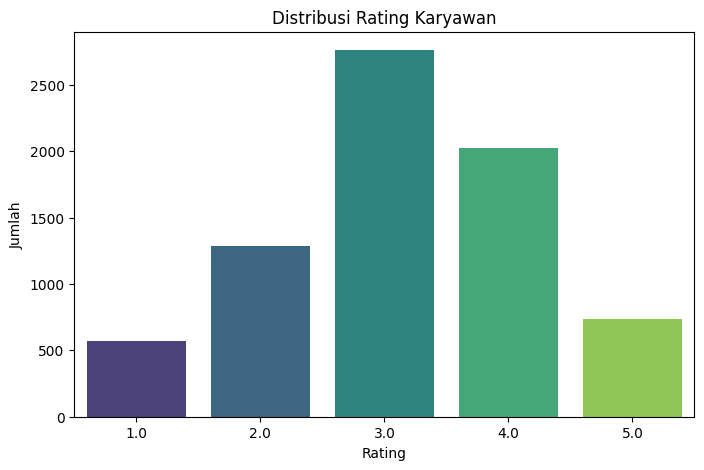

Deskriptif kompetensi - High Performer:


,count,mean,std,min,25%,50%,75%,max
CEX,667.0,4.673163,0.623308,2.0,4.00,5.0,5.0,5.0
CSI,667.0,4.682159,0.601072,2.0,4.00,5.0,5.0,5.0
FTC,674.0,4.679525,0.622483,2.0,4.25,5.0,5.0,5.0
GDR,671.0,4.667660,0.621611,2.0,4.00,5.0,5.0,5.0
IDS,673.0,4.659733,0.639799,2.0,4.00,5.0,5.0,5.0
LIE,680.0,4.673529,0.598874,2.0,4.00,5.0,5.0,5.0
QDD,672.0,4.696429,0.595652,2.0,5.00,5.0,5.0,5.0
SEA,688.0,4.691860,0.596782,2.0,5.00,5.0,5.0,5.0
STO,691.0,4.655572,0.634773,2.0,4.00,5.0,5.0,5.0
VCU,681.0,4.659325,0.640500,2.0,4.00,5.0,5.0,5.0


Deskriptif kompetensi - Non-High Performer:


,count,mean,std,min,25%,50%,75%,max
CEX,6732.0,2.947712,1.091396,1.0,2.0,3.0,4.0,5.0
CSI,6704.0,2.955996,1.095882,1.0,2.0,3.0,4.0,5.0
FTC,6721.0,2.952983,1.087068,1.0,2.0,3.0,4.0,5.0
GDR,6756.0,2.962404,1.086520,1.0,2.0,3.0,4.0,5.0
IDS,6751.0,2.964894,1.079415,1.0,2.0,3.0,4.0,5.0
LIE,6714.0,2.959190,1.086516,1.0,2.0,3.0,4.0,5.0
QDD,6701.0,2.959260,1.089425,1.0,2.0,3.0,4.0,5.0
SEA,6777.0,2.985244,1.089049,1.0,2.0,3.0,4.0,5.0
STO,6701.0,2.966871,1.092761,1.0,2.0,3.0,4.0,5.0
VCU,6718.0,2.975588,1.088191,1.0,2.0,3.0,4.0,5.0


C:\Users\fajar\AppData\Local\Temp\ipykernel_33128\1551525977.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='r', y=corrs_df.index, data=corrs_df, palette='magma')


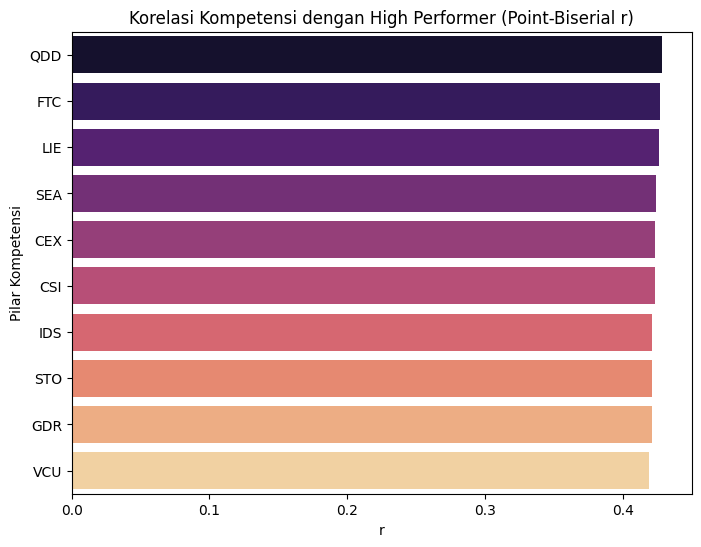

In [ ]:
# ============================================================
# IMPORT LIBRARIES
# ============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

# ============================================================
# DATA PREPARATION
# ============================================================

# Pastikan dataframe gabungan sudah ada:
# performance_with_comp
# kolom: ['employee_id','rating','year', 'CEX','CSI','FTC',..., 'VCU']

df = performance_with_comp.copy()

# Tambahkan target biner: High Performer = rating 5
df['is_high'] = (df['rating'] == 5).astype(int)

# ============================================================
# 1️⃣ Eksplorasi Deskriptif Rating
# ============================================================
rating_counts = df['rating'].value_counts().sort_index()
plt.figure(figsize=(8,5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
plt.title('Distribusi Rating Karyawan')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.show()

# ============================================================
# 2️⃣ Statistik Deskriptif Kompetensi per High Performer
# ============================================================
competency_cols = [c for c in df.columns if c not in ['employee_id','rating','year','is_high']]

# Deskriptif untuk high performer
df_high = df[df['is_high']==1]
df_low = df[df['is_high']==0]

print("Deskriptif kompetensi - High Performer:")
display(df_high[competency_cols].describe().T)

print("Deskriptif kompetensi - Non-High Performer:")
display(df_low[competency_cols].describe().T)

# ============================================================
# 3️⃣ Heatmap Korelasi Kompetensi dengan High Performer
# ============================================================
# Korelasi point-biserial antara kompetensi (numerik) dan is_high (biner)
corrs = {}
for col in competency_cols:
    valid = df[[col,'is_high']].dropna()
    if len(valid) > 5:
        r, p = stats.pointbiserialr(valid['is_high'], valid[col])
        corrs[col] = r

corrs_df = pd.DataFrame.from_dict(corrs, orient='index', columns=['r'])
corrs_df = corrs_df.sort_values('r', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='r', y=corrs_df.index, data=corrs_df, palette='magma')
plt.title('Korelasi Kompetensi dengan High Performer (Point-Biserial r)')
plt.xlabel('r')
plt.ylabel('Pilar Kompetensi')
plt.show()


C:\Users\fajar\AppData\Local\Temp\ipykernel_33128\2377384489.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_high', y='CEX', palette='Set2')


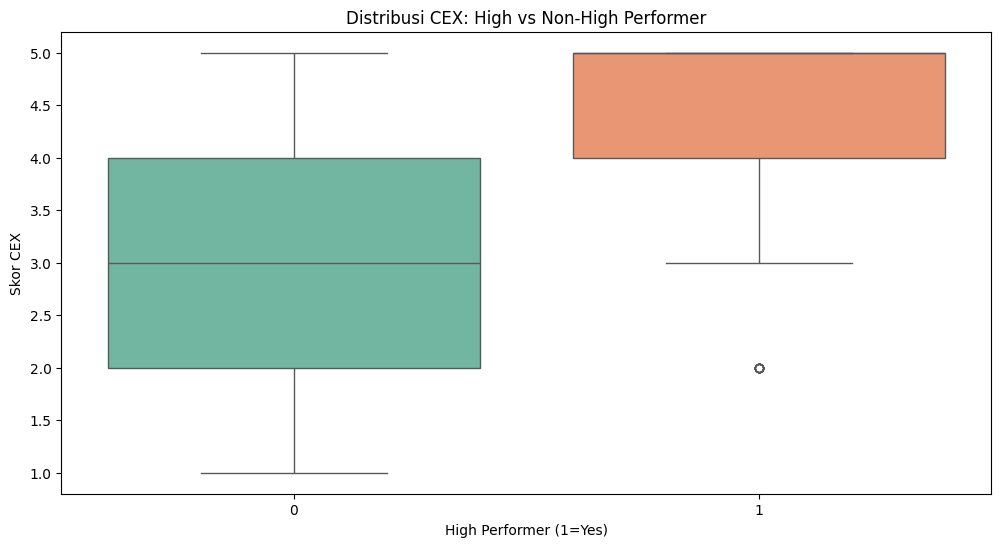

In [ ]:

# ============================================================
# 4️⃣ Distribusi Kompetensi High vs Low (Boxplot)
# ============================================================
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='is_high', y='CEX', palette='Set2')
plt.title('Distribusi CEX: High vs Non-High Performer')
plt.xlabel('High Performer (1=Yes)')
plt.ylabel('Skor CEX')
plt.show()

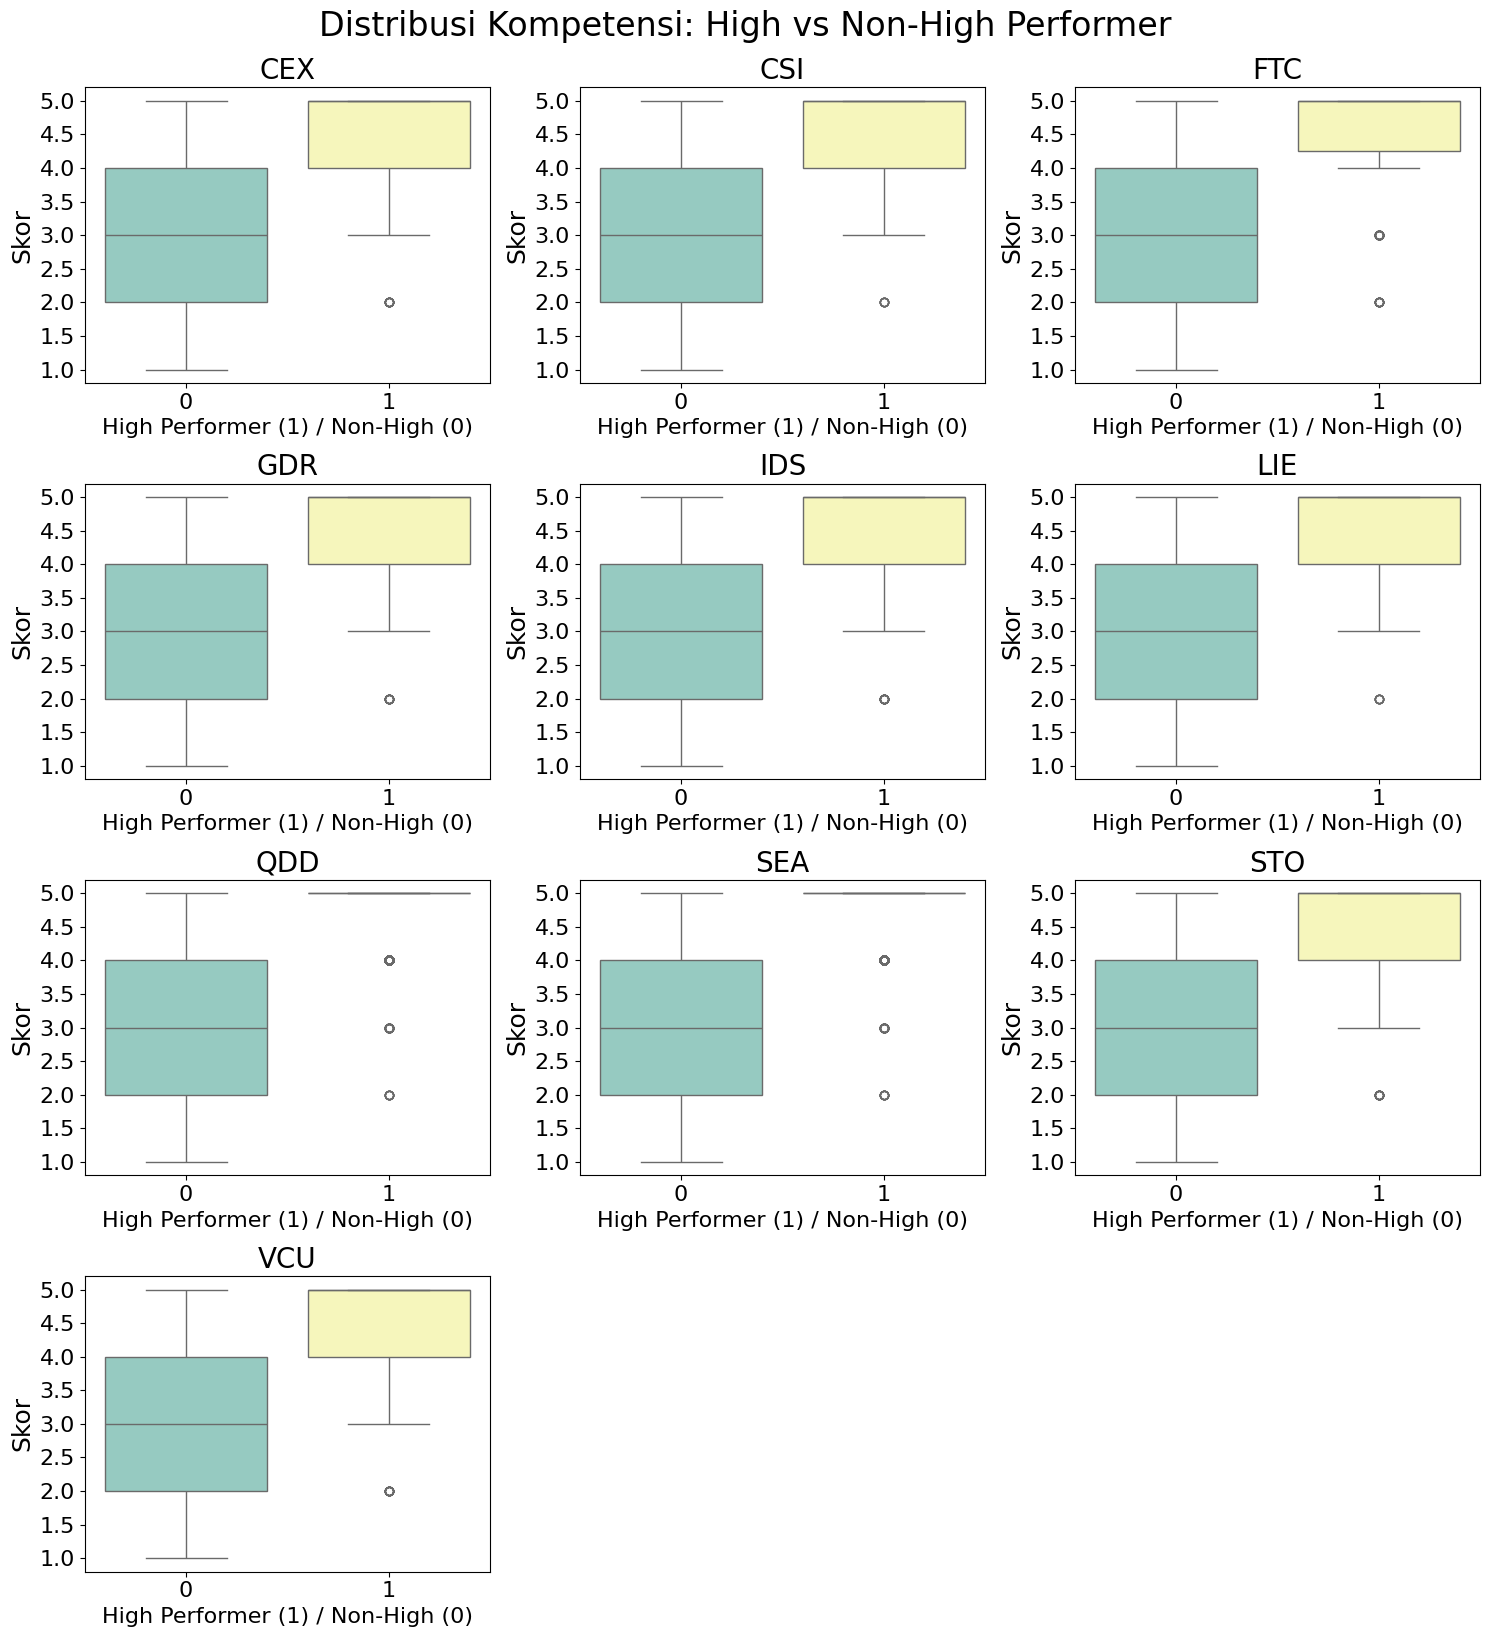

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Misal competency_cols sudah ada
competency_cols = [c for c in df.columns if c not in ['employee_id','rating','year','is_high']]

# Tentukan layout grid
n_cols = 3  # jumlah kolom subplot per baris
n_rows = math.ceil(len(competency_cols) / n_cols)

plt.figure(figsize=(5*n_cols, 4*n_rows))

for i, col in enumerate(competency_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=df, x='is_high', y=col, palette='Set3')
    plt.title(col, fontsize=20)
    plt.xlabel('High Performer (1) / Non-High (0)', fontsize=16)
    plt.ylabel('Skor', fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.tight_layout()

plt.suptitle('Distribusi Kompetensi: High vs Non-High Performer', fontsize=24, y=1.02)
plt.show()


C:\Users\fajar\AppData\Local\Temp\ipykernel_33128\1830222745.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_high', y=col, palette='Set3')


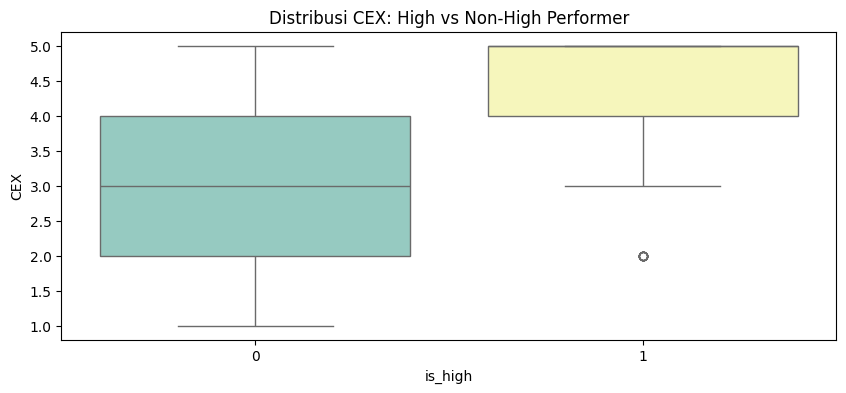

C:\Users\fajar\AppData\Local\Temp\ipykernel_33128\1830222745.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_high', y=col, palette='Set3')


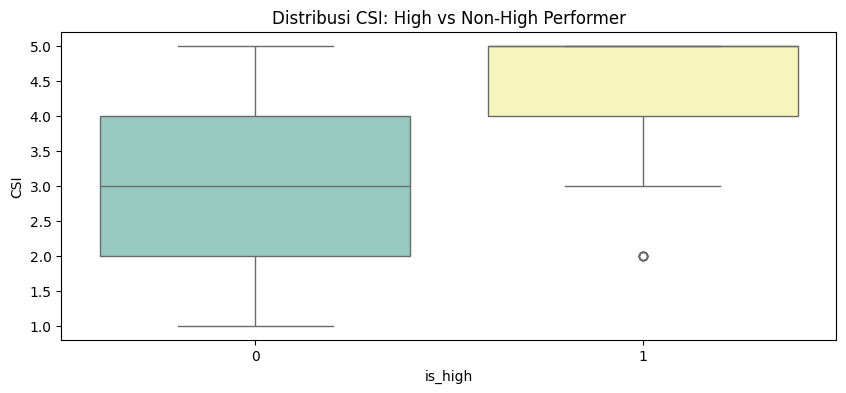

C:\Users\fajar\AppData\Local\Temp\ipykernel_33128\1830222745.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_high', y=col, palette='Set3')


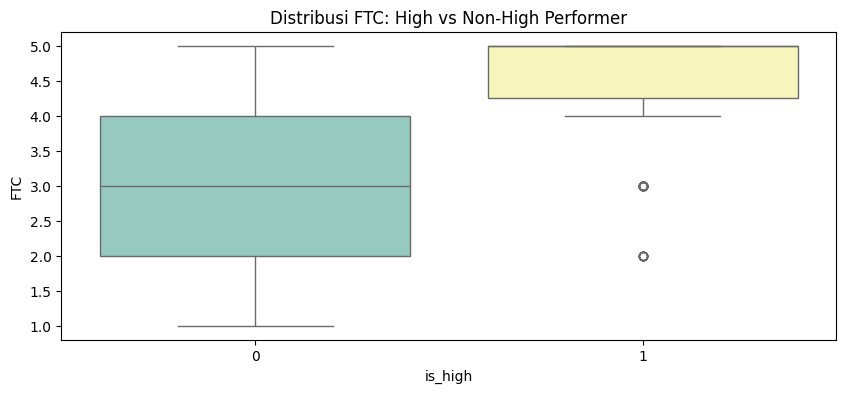

C:\Users\fajar\AppData\Local\Temp\ipykernel_33128\1830222745.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_high', y=col, palette='Set3')


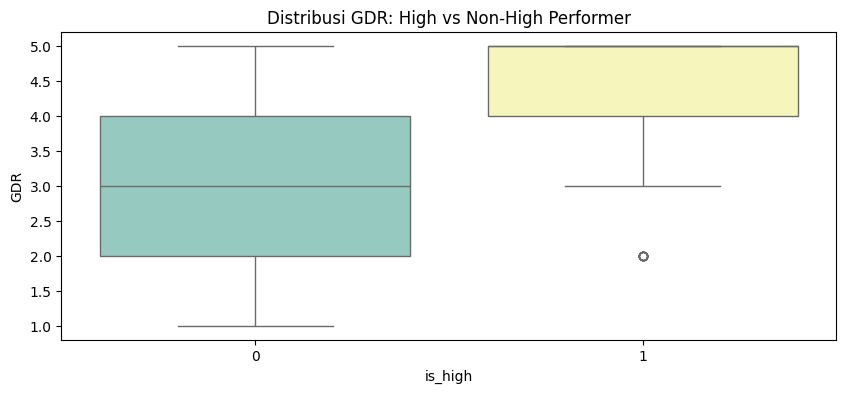

C:\Users\fajar\AppData\Local\Temp\ipykernel_33128\1830222745.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_high', y=col, palette='Set3')


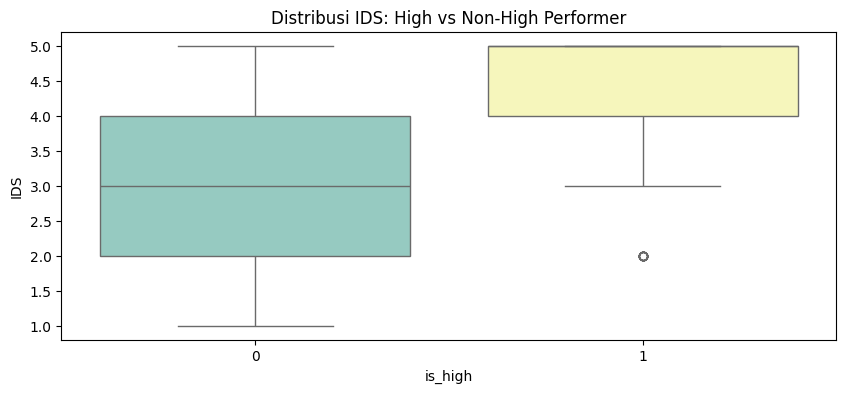

C:\Users\fajar\AppData\Local\Temp\ipykernel_33128\1830222745.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_high', y=col, palette='Set3')


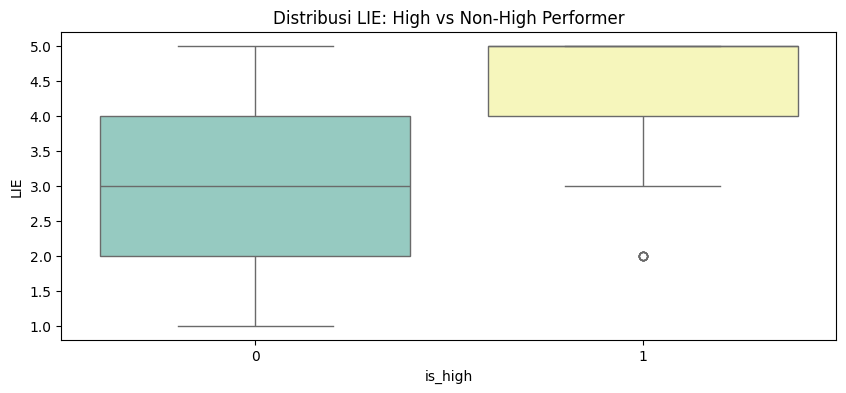

C:\Users\fajar\AppData\Local\Temp\ipykernel_33128\1830222745.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_high', y=col, palette='Set3')


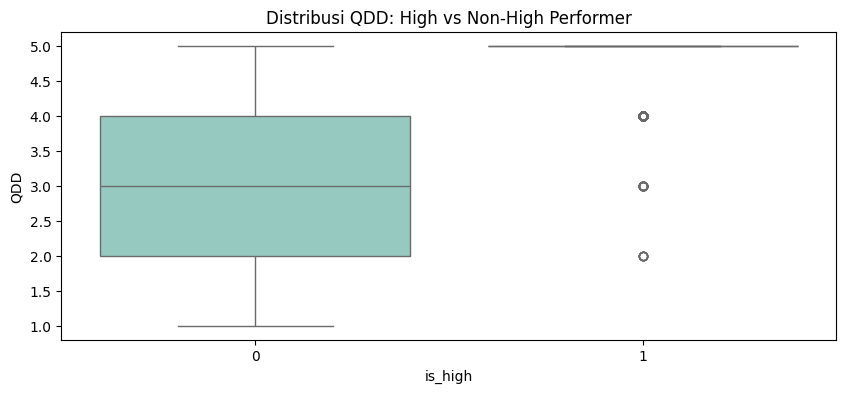

C:\Users\fajar\AppData\Local\Temp\ipykernel_33128\1830222745.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_high', y=col, palette='Set3')


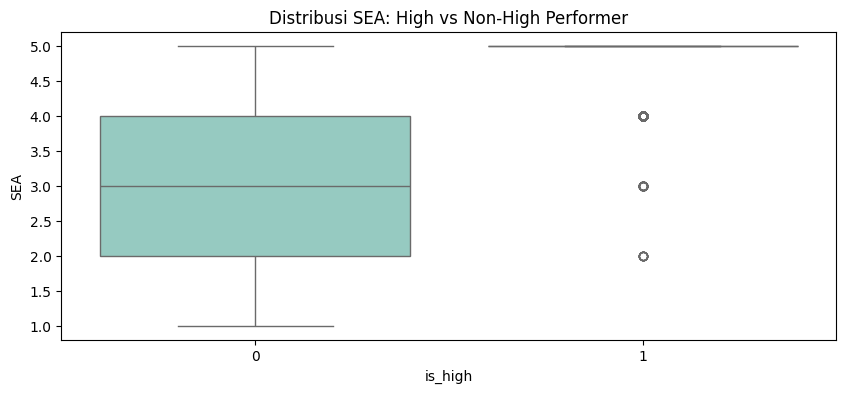

C:\Users\fajar\AppData\Local\Temp\ipykernel_33128\1830222745.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_high', y=col, palette='Set3')


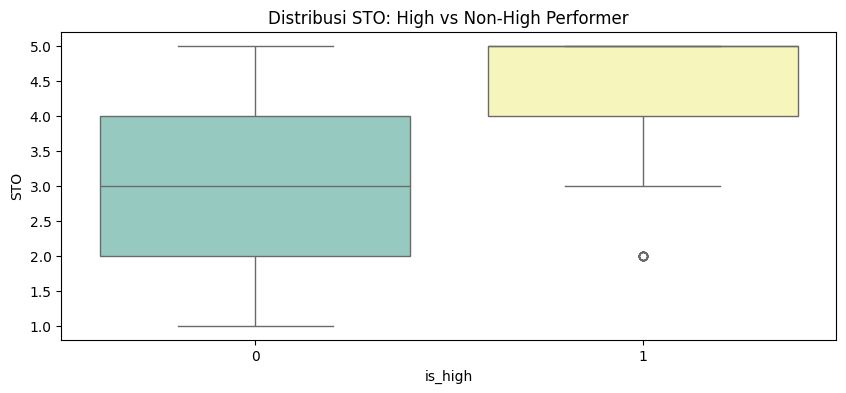

C:\Users\fajar\AppData\Local\Temp\ipykernel_33128\1830222745.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_high', y=col, palette='Set3')


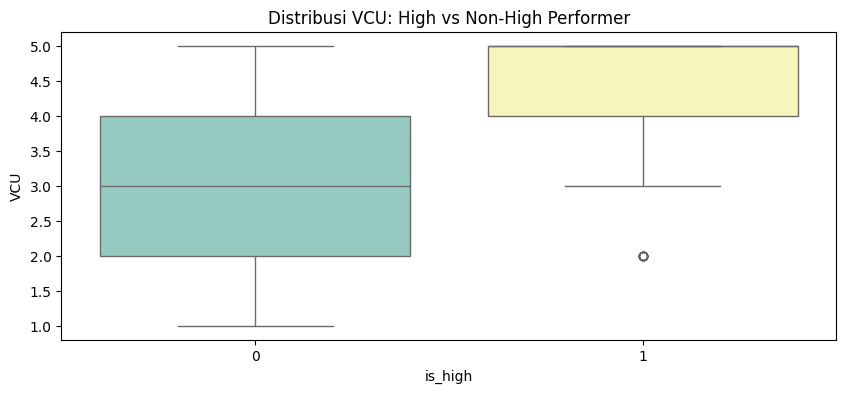

In [ ]:
# Bisa diulang untuk pilar lain atau loop otomatis:
for col in competency_cols:
    plt.figure(figsize=(10,4))
    sns.boxplot(data=df, x='is_high', y=col, palette='Set3')
    plt.title(f'Distribusi {col}: High vs Non-High Performer')
    plt.show()

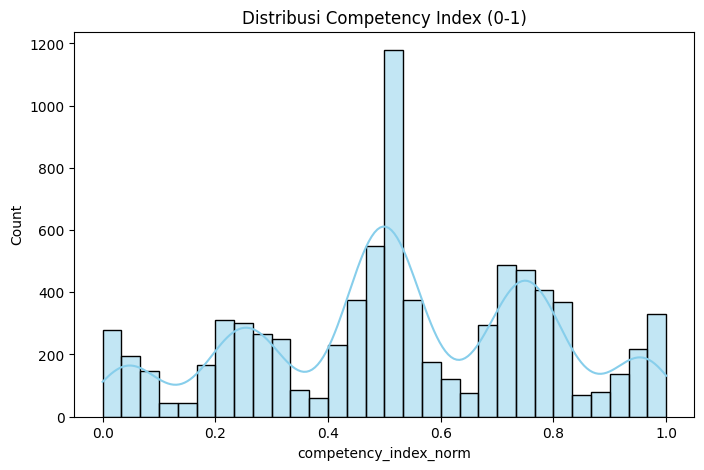

In [ ]:
# ============================================================
# 5️⃣ Buat Competency Index (Weighted atau Simple Average)
# ============================================================
# Cara sederhana: rata-rata skor pilar yang ada
df['competency_index'] = df[competency_cols].mean(axis=1)

# Normalisasi 0-1
scaler = MinMaxScaler()
df['competency_index_norm'] = scaler.fit_transform(df[['competency_index']])

plt.figure(figsize=(8,5))
sns.histplot(df['competency_index_norm'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Competency Index (0-1)')
plt.show()

C:\Users\fajar\AppData\Local\Temp\ipykernel_33128\4027906017.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette='viridis')


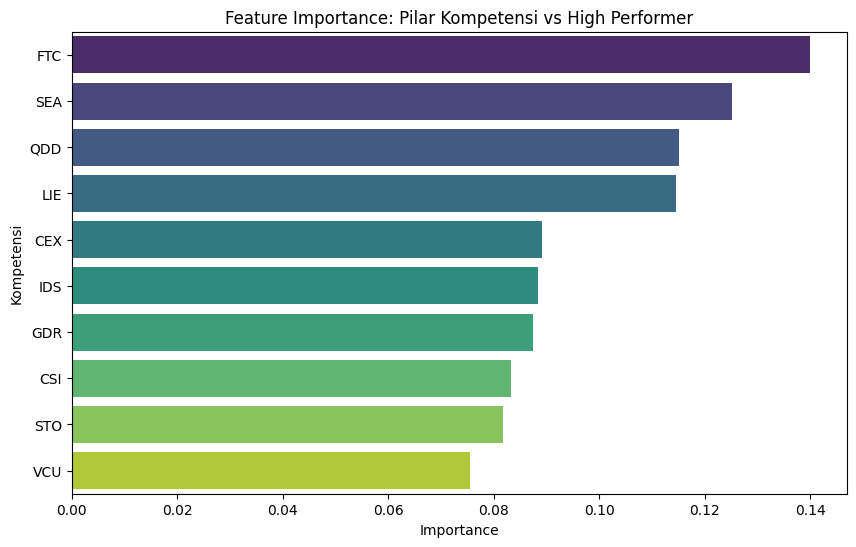

In [ ]:
# ============================================================
# Feature Importance Berdasarkan Pilar Kompetensi
# ============================================================

df = performance_with_comp.copy()
df['is_high'] = (df['rating'] == 5).astype(int)

competency_cols = [c for c in df.columns if c not in ['employee_id','rating','year','is_high']]

X = df[competency_cols].fillna(0)
y = df['is_high']

rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=competency_cols).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=importances.index, palette='viridis')
plt.title('Feature Importance: Pilar Kompetensi vs High Performer')
plt.xlabel('Importance')
plt.ylabel('Kompetensi')
plt.show()


C:\Users\fajar\AppData\Local\Temp\ipykernel_33128\1081251997.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette='viridis')


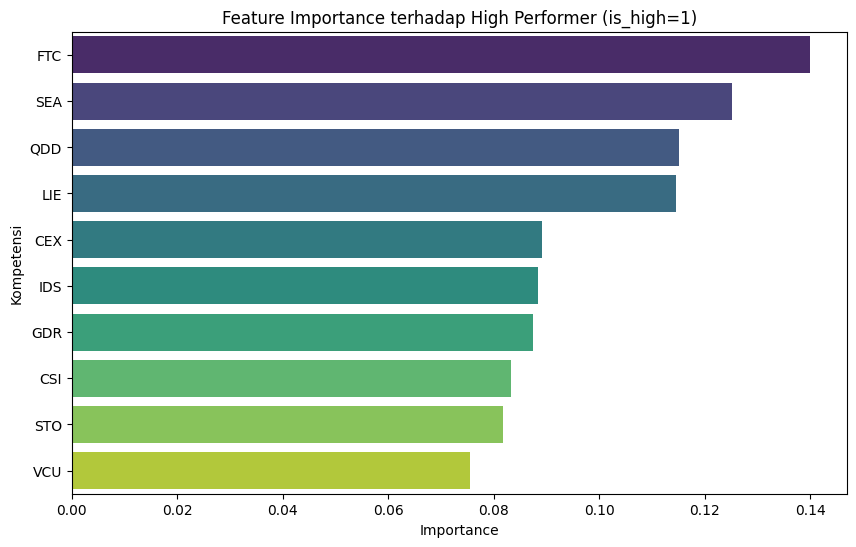

Top 5 Kompetensi Paling Berpengaruh:


FTC    0.139869
SEA    0.125057
QDD    0.115006
LIE    0.114491
CEX    0.089184
dtype: float64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ============================================================
# RANDOM FOREST FEATURE IMPORTANCE untuk IS_HIGH
# ============================================================


# Tentukan kolom kompetensi
competency_cols = [c for c in df.columns if c not in ['employee_id','rating','year','is_high']]

# Pisahkan fitur dan target
X = df[competency_cols].fillna(0)
y = df['is_high']

# Model Random Forest
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X, y)

# Hitung importance
importances = pd.Series(rf.feature_importances_, index=competency_cols).sort_values(ascending=False)

# Visualisasi
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=importances.index, palette='viridis')
plt.title('Feature Importance terhadap High Performer (is_high=1)')
plt.xlabel('Importance')
plt.ylabel('Kompetensi')
plt.show()

# Tampilkan 5 tertinggi
print("Top 5 Kompetensi Paling Berpengaruh:")
display(importances.head(5))


<Figure size 1000x600 with 0 Axes>

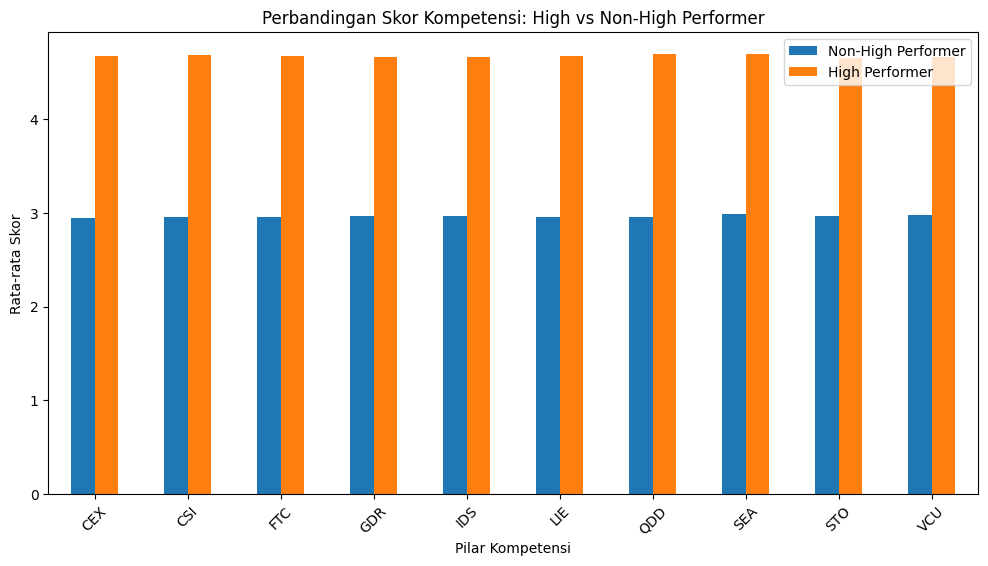

Selisih Rata-rata Skor (High - Non-High):


QDD    1.737169
FTC    1.726542
CSI    1.726163
CEX    1.725451
LIE    1.714340
SEA    1.706616
GDR    1.705256
IDS    1.694838
STO    1.688701
VCU    1.683737
dtype: float64

In [ ]:
# ============================================================
# PROFIL KOMPETENSI: High vs Non-High
# ============================================================

group_means = df.groupby('is_high')[competency_cols].mean().T
group_means.columns = ['Non-High Performer', 'High Performer']

# Plot perbandingan
plt.figure(figsize=(10,6))
group_means.plot(kind='bar', figsize=(12,6))
plt.title('Perbandingan Skor Kompetensi: High vs Non-High Performer')
plt.ylabel('Rata-rata Skor')
plt.xlabel('Pilar Kompetensi')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Tampilkan tabel selisih
diff = group_means['High Performer'] - group_means['Non-High Performer']
print("Selisih Rata-rata Skor (High - Non-High):")
display(diff.sort_values(ascending=False))


In [ ]:
df

,employee_id,rating,year,CEX,CSI,FTC,GDR,IDS,LIE,QDD,SEA,STO,VCU,is_high
0,EMP100000,2.0,2021,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0
1,EMP100002,2.0,2021,3.0,2.0,1.0,1.0,2.0,1.0,3.0,2.0,2.0,NaN,0
2,EMP100005,NaN,2021,3.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,NaN,2.0,0
3,EMP100006,4.0,2021,4.0,NaN,4.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,0
4,EMP100007,4.0,2021,4.0,5.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8079,DUP1942,5.0,2025,4.0,5.0,5.0,5.0,5.0,NaN,5.0,5.0,5.0,5.0,1
8080,DUP2096,3.0,2025,3.0,3.0,2.0,3.0,4.0,3.0,2.0,3.0,3.0,3.0,0
8081,DUP4177,2.0,2025,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,3.0,0
8082,DUP9801,5.0,2025,5.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,1


📊 Bobot penting tiap kompetensi:
FTC    0.138158
SEA    0.121862
LIE    0.118124
QDD    0.114006
IDS    0.088483
CEX    0.087769
CSI    0.086715
GDR    0.086425
STO    0.082394
VCU    0.076065
dtype: float64


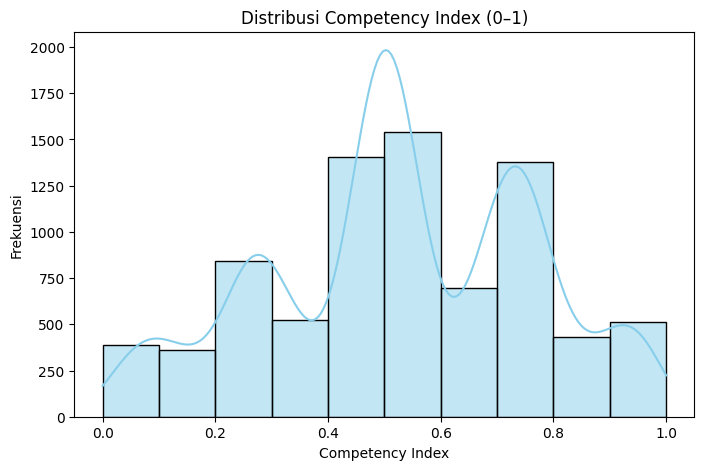

C:\Users\fajar\AppData\Local\Temp\ipykernel_33128\282583980.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_high', y='competency_index', data=df_norm, palette='Set2')


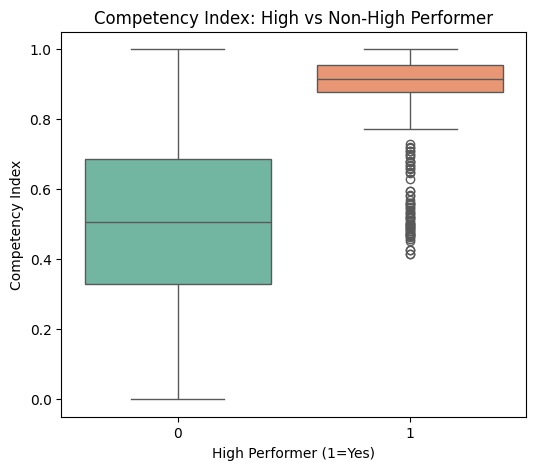

,employee_id,rating,competency_index
0,EMP100000,2.0,0.185781
1,EMP100002,2.0,0.236266
2,EMP100005,NaN,0.333460
3,EMP100006,4.0,0.723438
4,EMP100007,4.0,0.724161
...,...,...,...
8079,DUP1942,5.0,0.922447
8080,DUP2096,3.0,0.459080
8081,DUP4177,2.0,0.218908
8082,DUP9801,5.0,0.935930


In [ ]:
# === 2. Pilih kolom kompetensi numerik ===
competency_cols = ['CEX', 'CSI', 'FTC', 'GDR', 'IDS', 'LIE', 'QDD', 'SEA', 'STO', 'VCU']

# === 3. Tangani missing values ===
df[competency_cols] = df[competency_cols].fillna(df[competency_cols].mean())

# === 4. Normalisasi semua kolom kompetensi (0–1) ===
scaler = MinMaxScaler()
df_norm = df.copy()
df_norm[competency_cols] = scaler.fit_transform(df_norm[competency_cols])

# === 5. Latih model Random Forest untuk menghitung bobot pentingnya tiap kompetensi ===
X = df_norm[competency_cols]
y = df_norm['is_high']

rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=competency_cols)
weights = (importances / importances.sum()).to_dict()

print("📊 Bobot penting tiap kompetensi:")
print(importances.sort_values(ascending=False))

# === 6. Hitung competency index (gabungan berbobot) ===
df_norm['competency_index'] = 0.0
for col in competency_cols:
    df_norm['competency_index'] += df_norm[col] * weights.get(col, 0)

# Normalisasi lagi ke 0–1
df_norm['competency_index'] = MinMaxScaler().fit_transform(
    df_norm[['competency_index']]
)

# === 7. Visualisasi distribusi dan perbandingan High vs Non-High ===
plt.figure(figsize=(8,5))
sns.histplot(df_norm['competency_index'], bins=10, kde=True, color='skyblue')
plt.title("Distribusi Competency Index (0–1)")
plt.xlabel("Competency Index")
plt.ylabel("Frekuensi")
plt.show()

plt.figure(figsize=(6,5))
sns.boxplot(x='is_high', y='competency_index', data=df_norm, palette='Set2')
plt.title("Competency Index: High vs Non-High Performer")
plt.xlabel("High Performer (1=Yes)")
plt.ylabel("Competency Index")
plt.show()

# === 8. Lihat hasil akhir ===
df_norm[['employee_id', 'rating', 'competency_index']]

In [ ]:
top_comp = importances.head(3).index.tolist()
print(f"\n🔎 Kompetensi paling berpengaruh terhadap high performance: {', '.join(top_comp)}")

print("\n🧭 Interpretasi:")
print("Karyawan dengan skor tinggi pada kompetensi tersebut cenderung memiliki peluang lebih besar "
      "untuk mencapai rating 5, menandakan bahwa pilar-pilar ini merupakan kunci utama kesuksesan kinerja.")



🔎 Kompetensi paling berpengaruh terhadap high performance: CEX, CSI, FTC

🧭 Interpretasi:
Karyawan dengan skor tinggi pada kompetensi tersebut cenderung memiliki peluang lebih besar untuk mencapai rating 5, menandakan bahwa pilar-pilar ini merupakan kunci utama kesuksesan kinerja.


In [ ]:
diff = df.groupby('is_high')[competency_cols].mean().T
diff['selisih'] = diff.loc[:,1] - diff.loc[:,0]
display(diff.sort_values('selisih', ascending=False))


is_high,0,1,selisih
SEA,2.997467,4.590817,1.593351
QDD,2.973201,4.559138,1.585937
LIE,2.972793,4.555087,1.582293
STO,2.980770,4.561974,1.581204
FTC,2.966411,4.547339,1.580928
CSI,2.969686,4.534975,1.565289
CEX,2.960752,4.525985,1.565233
VCU,2.988875,4.545082,1.556208
GDR,2.974816,4.530666,1.555850
IDS,2.977377,4.527809,1.550432


In [ ]:
# Normalisasi bobot agar total = 1
weights_norm = importances / importances.sum()

print("Success Formula – Competency Component:")
for k, v in weights_norm.items():
    print(f" + {v:.2f} * {k}")


Success Formula – Competency Component:
 + 0.09 * CEX
 + 0.09 * CSI
 + 0.14 * FTC
 + 0.09 * GDR
 + 0.09 * IDS
 + 0.12 * LIE
 + 0.11 * QDD
 + 0.12 * SEA
 + 0.08 * STO
 + 0.08 * VCU
